<a href="https://colab.research.google.com/github/vikaschaudhary53/bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [557]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [558]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [559]:
file_path = '/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project-Linear Regression/SeoulBikeData.csv'

In [560]:
df = pd.read_csv(file_path, encoding="ISO-8859–1")

#Data Prep

In [561]:
#Top 5 rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [562]:
#Bottom 5 rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [563]:
df.shape

(8760, 14)

In [564]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [565]:
#description about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [566]:
#Distribution of numerical values
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [567]:
#Duplicate Values
len(df[df.duplicated()])

0

In [568]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [569]:
#Rename the Columns
column_dict = {'Date':'date', 'Rented Bike Count':'rented_bikes', 'Hour':'hour', 'Temperature(°C)':'temperature', 'Humidity(%)':'humidity', 'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility', 
               'Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radiation', 'Rainfall(mm)':'rainfall', 'Snowfall (cm)': 'snowfall', 'Seasons':'seasons', 'Holiday':'holiday', 'Functioning Day':'functioning_day'}

In [570]:
df.rename(columns= column_dict, inplace=True)

In [571]:
df

date  rented_bikes  hour  temperature  humidity  wind_speed  \
0     01/12/2017           254     0         -5.2        37         2.2   
1     01/12/2017           204     1         -5.5        38         0.8   
2     01/12/2017           173     2         -6.0        39         1.0   
3     01/12/2017           107     3         -6.2        40         0.9   
4     01/12/2017            78     4         -6.0        36         2.3   
...          ...           ...   ...          ...       ...         ...   
8755  30/11/2018          1003    19          4.2        34         2.6   
8756  30/11/2018           764    20          3.4        37         2.3   
8757  30/11/2018           694    21          2.6        39         0.3   
8758  30/11/2018           712    22          2.1        41         1.0   
8759  30/11/2018           584    23          1.9        43         1.3   

      visibility  dew_point_temperature  solar_radiation  rainfall  snowfall  \
0           2000                  -17.6              0.0       0.0       0.0   
1           2000                  -17.6              0.0       0.0       0.0   
2           2000                  -17.7              0.0       0.0       0.0   
3           2000                  -17.6              0.0       0.0       0.0   
4           2000                  -18.6              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

     seasons     holiday functioning_day  
0     Winter  No Holiday             Yes  
1     Winter  No Holiday             Yes  
2     Winter  No Holiday             Yes  
3     Winter  No Holiday             Yes  
4     Winter  No Holiday             Yes  
...      ...         ...             ...  
8755  Autumn  No Holiday             Yes  
8756  Autumn  No Holiday             Yes  
8757  Autumn  No Holiday             Yes  
8758  Autumn  No Holiday             Yes  
8759  Autumn  No Holiday             Yes  

[8760 rows x 14 columns]

In [572]:
len(df['date'].value_counts())*len(df['hour'].value_counts())

8760

About Dataset:
1. It has no 'Null'/'NaN' or missing values
2. No Duplicate rows

####Extracting the 'date', 'month' from complete date

In [573]:
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [574]:
#date, month, day name, month name
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['week_num'] = df['date'].dt.day_of_week

In [575]:
#Creating a column to show the day as weekday or weekend
df['week'] = df['day_name'].apply(lambda x: "weekend" if x=='Saturday' or x == 'Sunday' else 'weekday')

In [576]:
df.head()

date  rented_bikes  hour  temperature  humidity  wind_speed  \
0 2017-12-01           254     0         -5.2        37         2.2   
1 2017-12-01           204     1         -5.5        38         0.8   
2 2017-12-01           173     2         -6.0        39         1.0   
3 2017-12-01           107     3         -6.2        40         0.9   
4 2017-12-01            78     4         -6.0        36         2.3   

   visibility  dew_point_temperature  solar_radiation  rainfall  ...  seasons  \
0        2000                  -17.6              0.0       0.0  ...   Winter   
1        2000                  -17.6              0.0       0.0  ...   Winter   
2        2000                  -17.7              0.0       0.0  ...   Winter   
3        2000                  -17.6              0.0       0.0  ...   Winter   
4        2000                  -18.6              0.0       0.0  ...   Winter   

      holiday functioning_day  year  month  month_name day  day_name week_num  \
0  No Holiday             Yes  2017     12    December   1    Friday        4   
1  No Holiday             Yes  2017     12    December   1    Friday        4   
2  No Holiday             Yes  2017     12    December   1    Friday        4   
3  No Holiday             Yes  2017     12    December   1    Friday        4   
4  No Holiday             Yes  2017     12    December   1    Friday        4   

      week  
0  weekday  
1  weekday  
2  weekday  
3  weekday  
4  weekday  

[5 rows x 21 columns]

In [577]:
#Dropping the 'date' column since date, month are extracted from 'date'
df = df.drop(columns='date')

In [578]:
df

rented_bikes  hour  temperature  humidity  wind_speed  visibility  \
0              254     0         -5.2        37         2.2        2000   
1              204     1         -5.5        38         0.8        2000   
2              173     2         -6.0        39         1.0        2000   
3              107     3         -6.2        40         0.9        2000   
4               78     4         -6.0        36         2.3        2000   
...            ...   ...          ...       ...         ...         ...   
8755          1003    19          4.2        34         2.6        1894   
8756           764    20          3.4        37         2.3        2000   
8757           694    21          2.6        39         0.3        1968   
8758           712    22          2.1        41         1.0        1859   
8759           584    23          1.9        43         1.3        1909   

      dew_point_temperature  solar_radiation  rainfall  snowfall seasons  \
0                     -17.6              0.0       0.0       0.0  Winter   
1                     -17.6              0.0       0.0       0.0  Winter   
2                     -17.7              0.0       0.0       0.0  Winter   
3                     -17.6              0.0       0.0       0.0  Winter   
4                     -18.6              0.0       0.0       0.0  Winter   
...                     ...              ...       ...       ...     ...   
8755                  -10.3              0.0       0.0       0.0  Autumn   
8756                   -9.9              0.0       0.0       0.0  Autumn   
8757                   -9.9              0.0       0.0       0.0  Autumn   
8758                   -9.8              0.0       0.0       0.0  Autumn   
8759                   -9.3              0.0       0.0       0.0  Autumn   

         holiday functioning_day  year  month month_name  day day_name  \
0     No Holiday             Yes  2017     12   December    1   Friday   
1     No Holiday             Yes  2017     12   December    1   Friday   
2     No Holiday             Yes  2017     12   December    1   Friday   
3     No Holiday             Yes  2017     12   December    1   Friday   
4     No Holiday             Yes  2017     12   December    1   Friday   
...          ...             ...   ...    ...        ...  ...      ...   
8755  No Holiday             Yes  2018     11   November   30   Friday   
8756  No Holiday             Yes  2018     11   November   30   Friday   
8757  No Holiday             Yes  2018     11   November   30   Friday   
8758  No Holiday             Yes  2018     11   November   30   Friday   
8759  No Holiday             Yes  2018     11   November   30   Friday   

      week_num     week  
0            4  weekday  
1            4  weekday  
2            4  weekday  
3            4  weekday  
4            4  weekday  
...        ...      ...  
8755         4  weekday  
8756         4  weekday  
8757         4  weekday  
8758         4  weekday  
8759         4  weekday  

[8760 rows x 20 columns]

#EDA

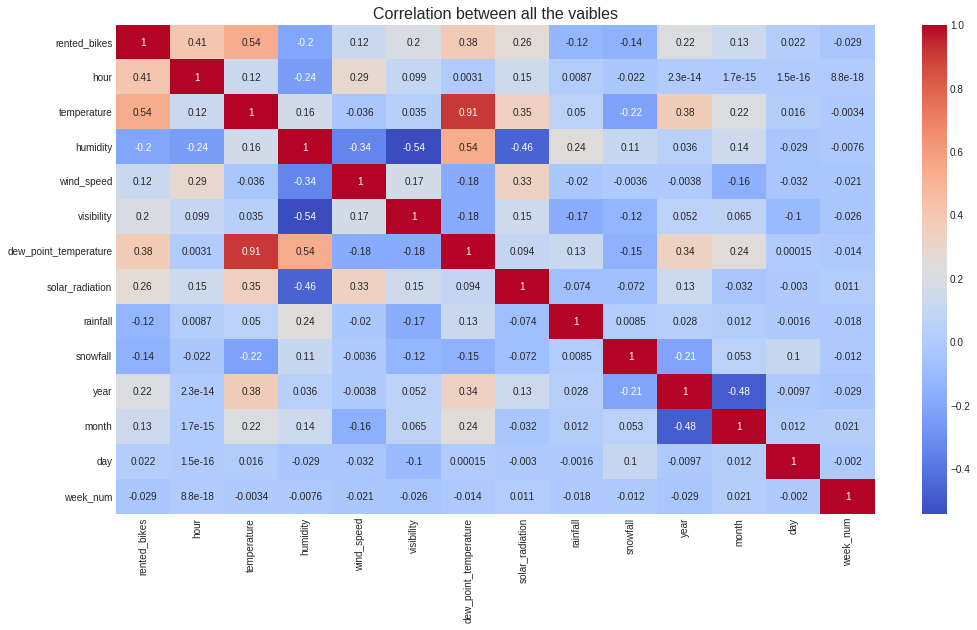

In [579]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

'temperature' and 'dew_point_temperature' are highly correlated, so dropping 'dew_point_temperature'

In [580]:
df = df.drop(columns='dew_point_temperature')

In [581]:
df

rented_bikes  hour  temperature  humidity  wind_speed  visibility  \
0              254     0         -5.2        37         2.2        2000   
1              204     1         -5.5        38         0.8        2000   
2              173     2         -6.0        39         1.0        2000   
3              107     3         -6.2        40         0.9        2000   
4               78     4         -6.0        36         2.3        2000   
...            ...   ...          ...       ...         ...         ...   
8755          1003    19          4.2        34         2.6        1894   
8756           764    20          3.4        37         2.3        2000   
8757           694    21          2.6        39         0.3        1968   
8758           712    22          2.1        41         1.0        1859   
8759           584    23          1.9        43         1.3        1909   

      solar_radiation  rainfall  snowfall seasons     holiday functioning_day  \
0                 0.0       0.0       0.0  Winter  No Holiday             Yes   
1                 0.0       0.0       0.0  Winter  No Holiday             Yes   
2                 0.0       0.0       0.0  Winter  No Holiday             Yes   
3                 0.0       0.0       0.0  Winter  No Holiday             Yes   
4                 0.0       0.0       0.0  Winter  No Holiday             Yes   
...               ...       ...       ...     ...         ...             ...   
8755              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8756              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8757              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8758              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8759              0.0       0.0       0.0  Autumn  No Holiday             Yes   

      year  month month_name  day day_name  week_num     week  
0     2017     12   December    1   Friday         4  weekday  
1     2017     12   December    1   Friday         4  weekday  
2     2017     12   December    1   Friday         4  weekday  
3     2017     12   December    1   Friday         4  weekday  
4     2017     12   December    1   Friday         4  weekday  
...    ...    ...        ...  ...      ...       ...      ...  
8755  2018     11   November   30   Friday         4  weekday  
8756  2018     11   November   30   Friday         4  weekday  
8757  2018     11   November   30   Friday         4  weekday  
8758  2018     11   November   30   Friday         4  weekday  
8759  2018     11   November   30   Friday         4  weekday  

[8760 rows x 19 columns]

In [582]:
#creating a list of numerical columns
numerical_columns = ['temperature','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall']

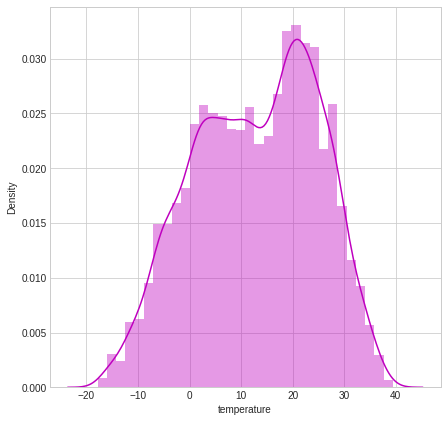

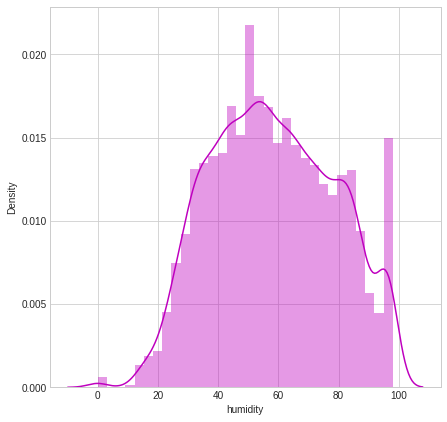

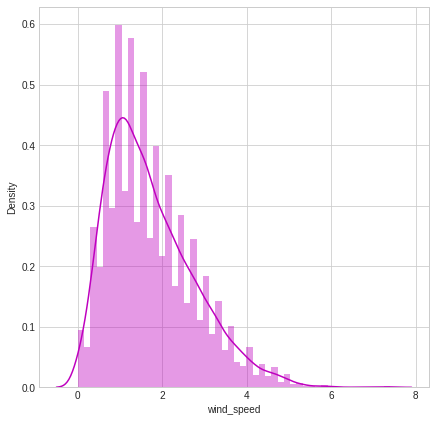

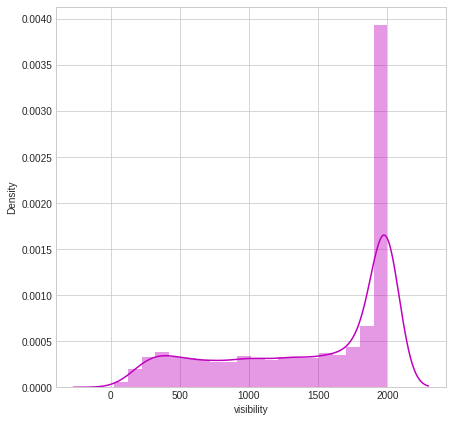

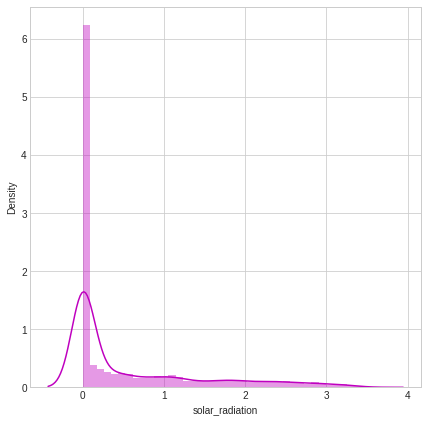

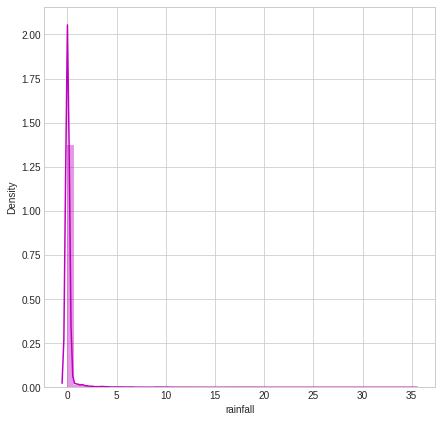

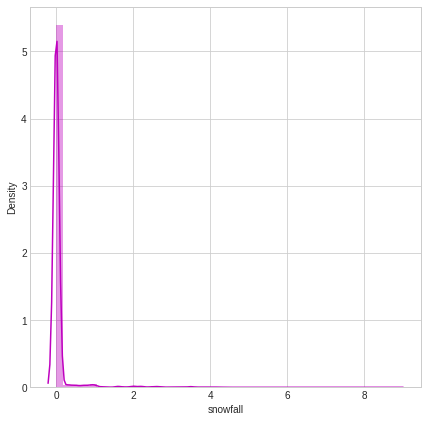

In [583]:
#distplot for numerical features
for val in numerical_columns:
  plt.figure(figsize=(7,7))
  plt.style.use('seaborn-whitegrid')
  sns.distplot(df[val],color="m")
  plt.show()

About Distribution Plots:
1. 'temperature' and 'humidity' are ~normal distribution
2. 'wind_speed', 'rainfall' and 'snowfall' are right skewed
3. 'visibility' is left skewed 

####Bar Graph to show the different dates and Occasions

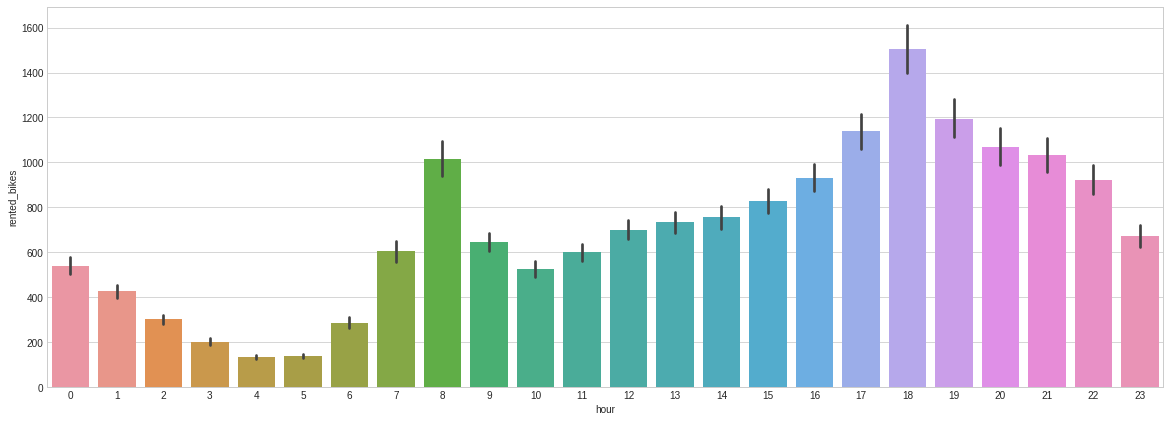

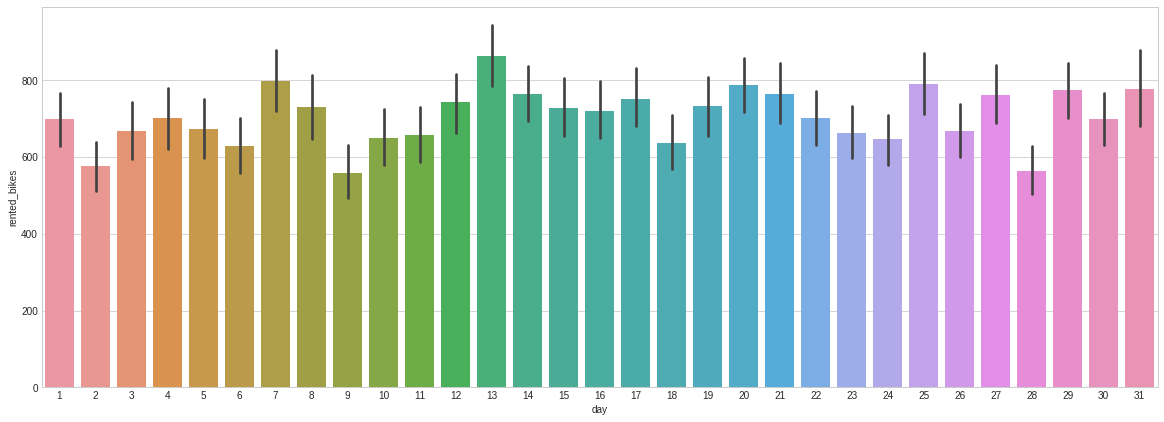

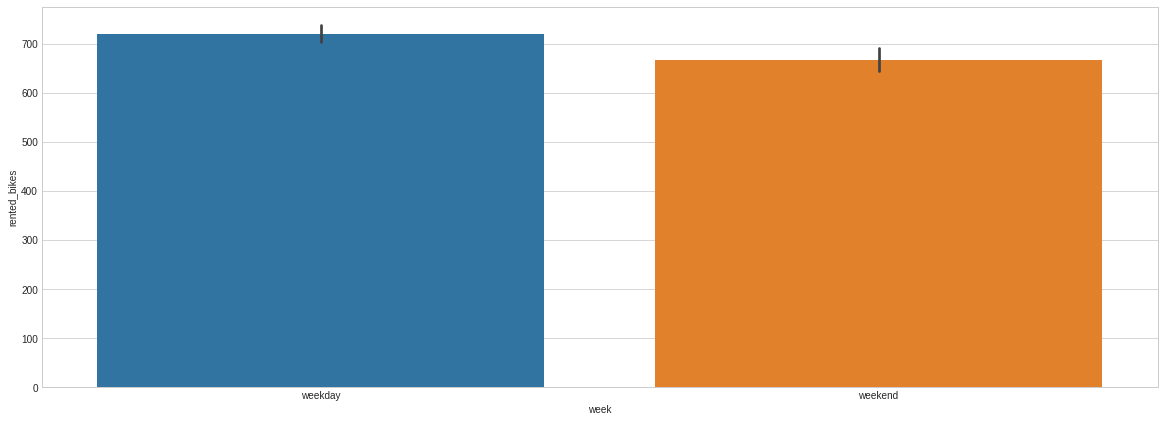

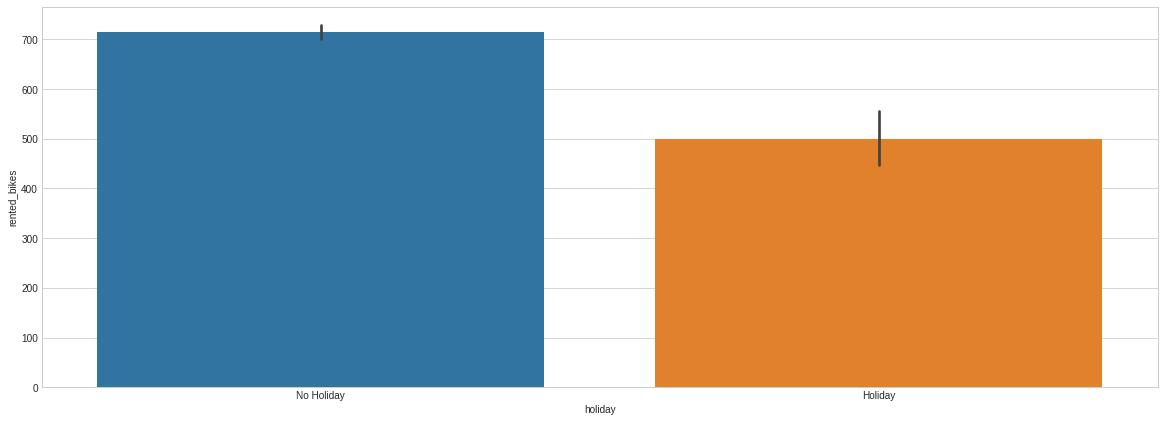

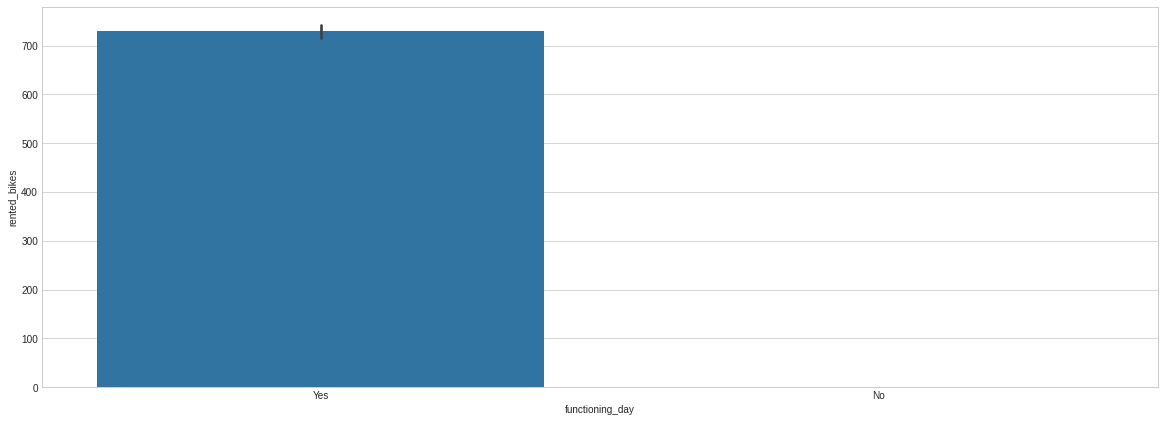

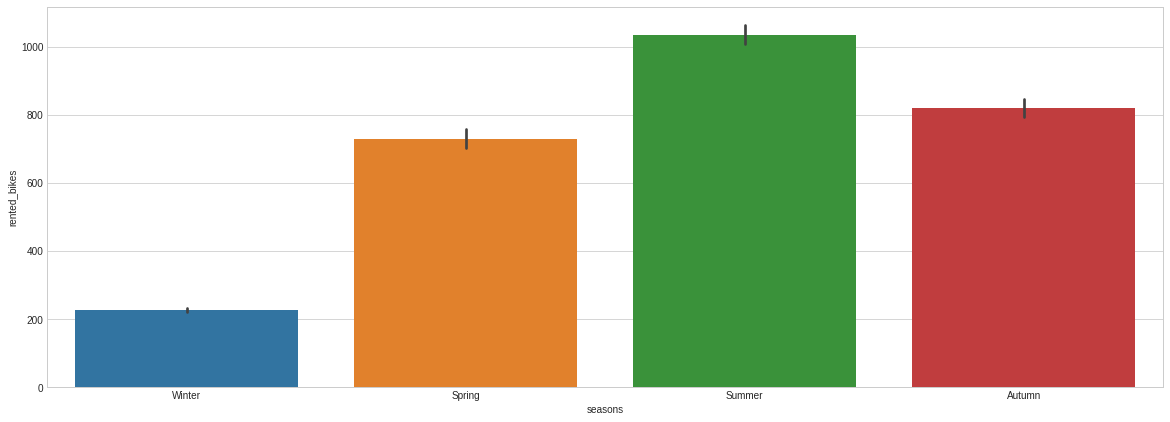

In [584]:
temp_list = ['hour','day', 'week','holiday','functioning_day','seasons']
for col in temp_list:
  plt.figure(figsize=(20,7))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='rented_bikes')

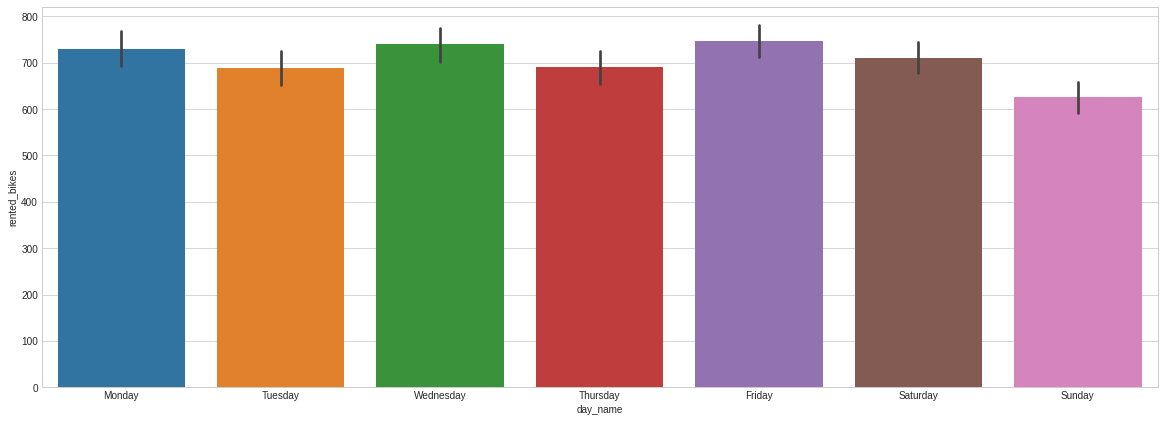

In [585]:
plt.figure(figsize=(20,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=df.sort_values(by=['week_num']),x='day_name',y='rented_bikes')

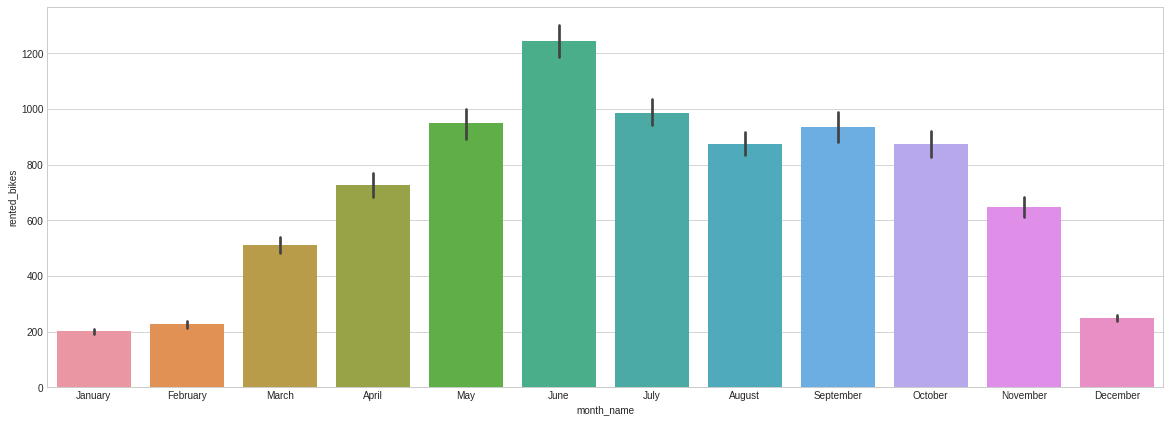

In [586]:
plt.figure(figsize=(20,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=df.sort_values(by=['month']),x='month_name',y='rented_bikes')

About the above Bar Graphs:
1. Evening has high average bike rentals, esp. 4-10 PM timeframe
2. During morning time 8 AM has most number of rented bike count, indicating the travel before working hours.
3. During days 'Sunday' has least operation, while other days are nearly have similar average bike rents.
4. June has the highest while January has the lowest average bike rents. We can say Summars have the highest average bike rents whicle Winters have least.
5. Weekends have slightly lower bike rents as compare to weekdays.
6. Holidays have low bike rents as compare to No Holidays.
7. Only Functioning Days have any bike rental operations.

[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday')]

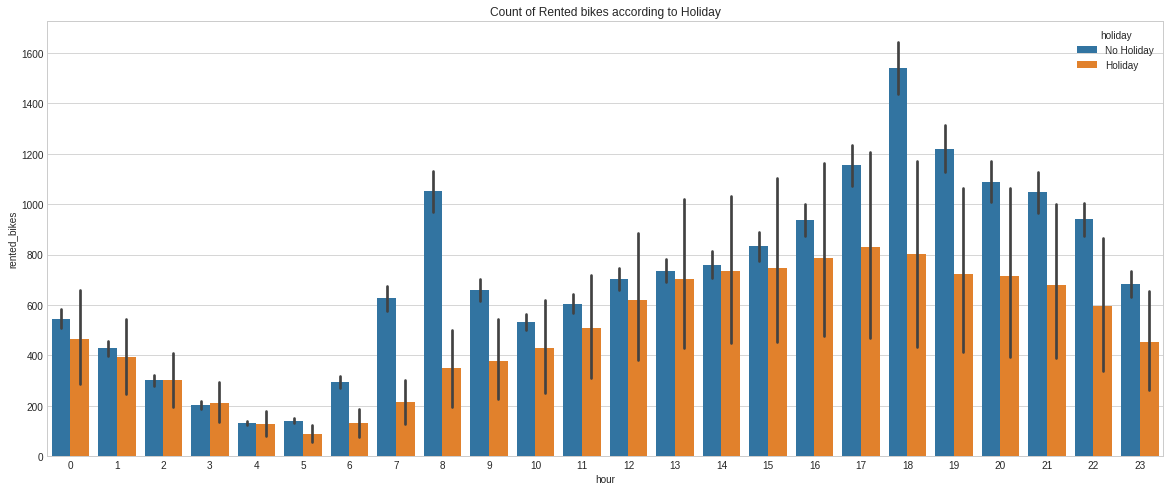

In [587]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='hour',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes according to Holiday')


[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday')]

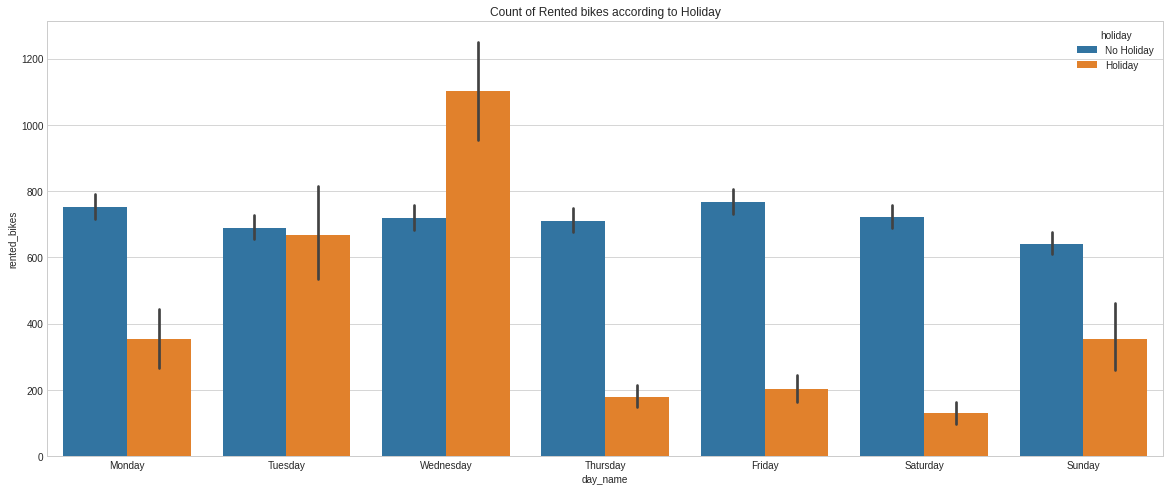

In [588]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df.sort_values(by=['week_num']),x='day_name',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes according to Holiday')

[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday')]

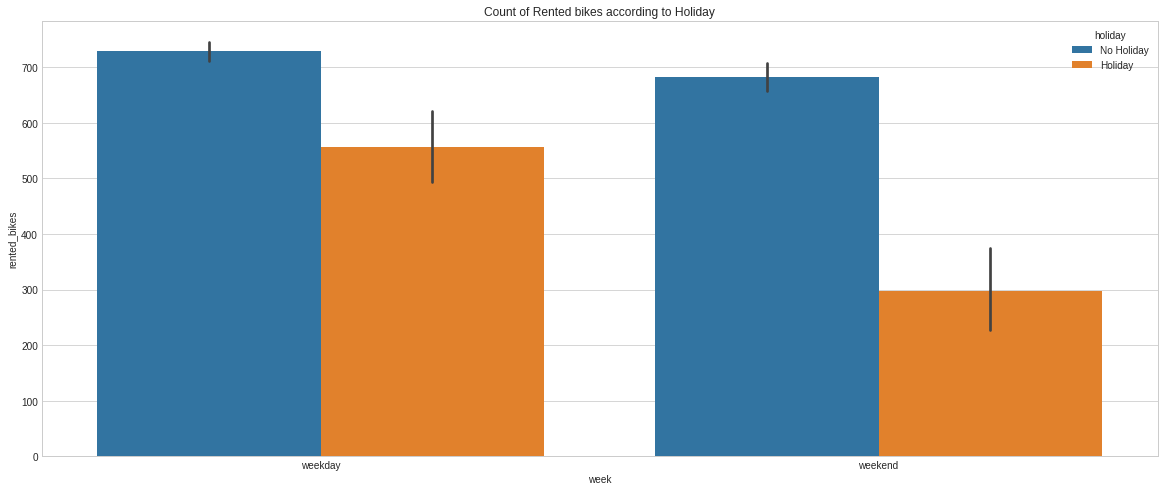

In [589]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='week',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes according to Holiday')

[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday')]

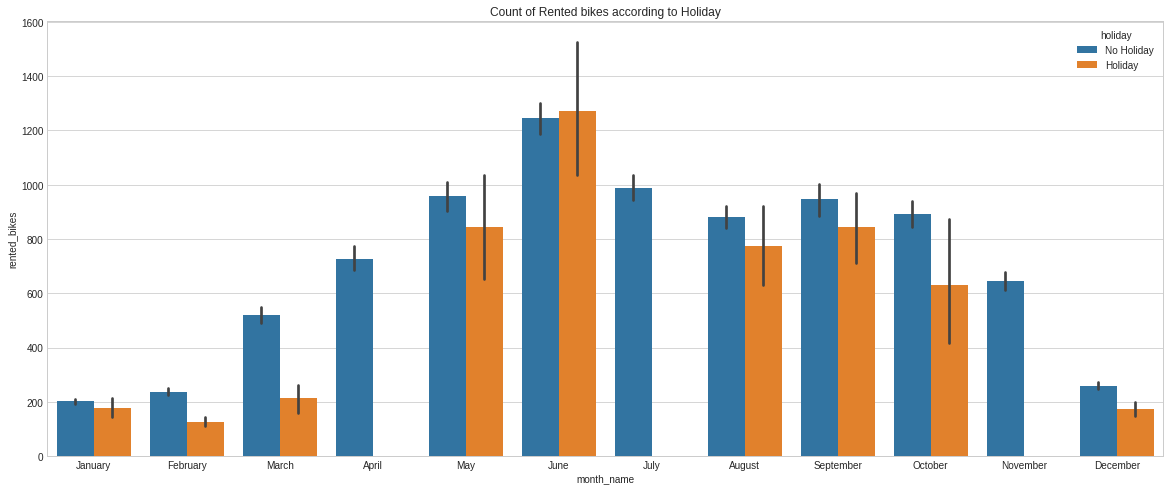

In [590]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df.sort_values(by=['month']),x='month_name',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes according to Holiday')

Some months have no bike rent on Holiday, we need to confirm this

In [591]:
#For April
df[(df['month_name']=='April') & (df['holiday']=='Holiday')]

Empty DataFrame
Columns: [rented_bikes, hour, temperature, humidity, wind_speed, visibility, solar_radiation, rainfall, snowfall, seasons, holiday, functioning_day, year, month, month_name, day, day_name, week_num, week]
Index: []

In [592]:
#For July
df[(df['month_name']=='July') & (df['holiday']=='Holiday')]

Empty DataFrame
Columns: [rented_bikes, hour, temperature, humidity, wind_speed, visibility, solar_radiation, rainfall, snowfall, seasons, holiday, functioning_day, year, month, month_name, day, day_name, week_num, week]
Index: []

In [593]:
#For November
df[(df['month_name']=='November') & (df['holiday']=='Holiday')]

Empty DataFrame
Columns: [rented_bikes, hour, temperature, humidity, wind_speed, visibility, solar_radiation, rainfall, snowfall, seasons, holiday, functioning_day, year, month, month_name, day, day_name, week_num, week]
Index: []

[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday')]

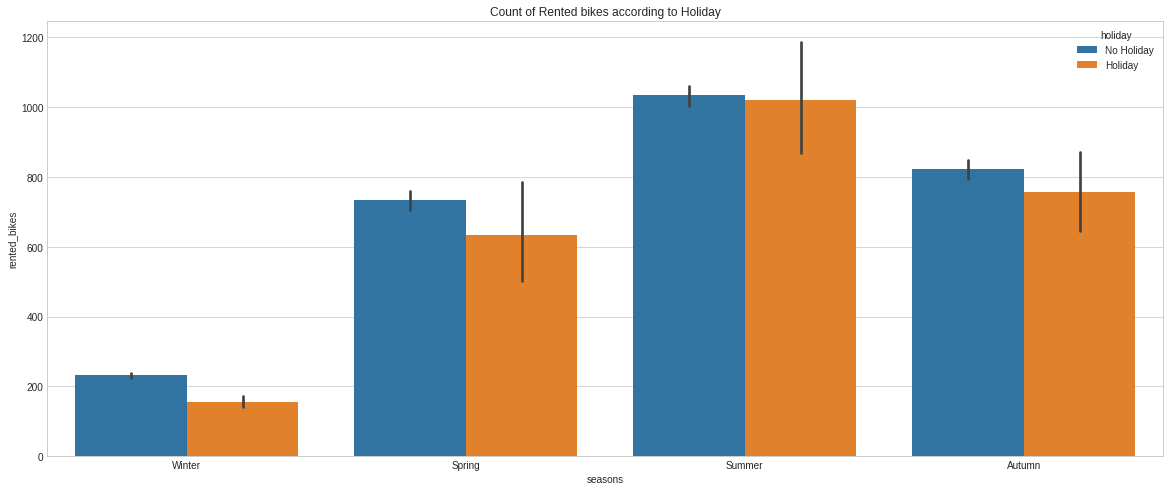

In [594]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='seasons',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes according to Holiday')

Distribution of Bikes on Holidays and Non Holidays on differents Days and Time

1. Wednesday has the higher average bike rents on Holiday as compare No Holiday while other days have higher bike rents on No Holiday.
2. 'April', 'July' and 'November' have no bike rent on Holiday, 'June' has higher bike rents on Holiday.
3. Summer has the least difference in the average bike rents on Holiday and No Holiday.

[Text(0.5, 1.0, 'Count of Rented bikes according to hour on daily basis')]

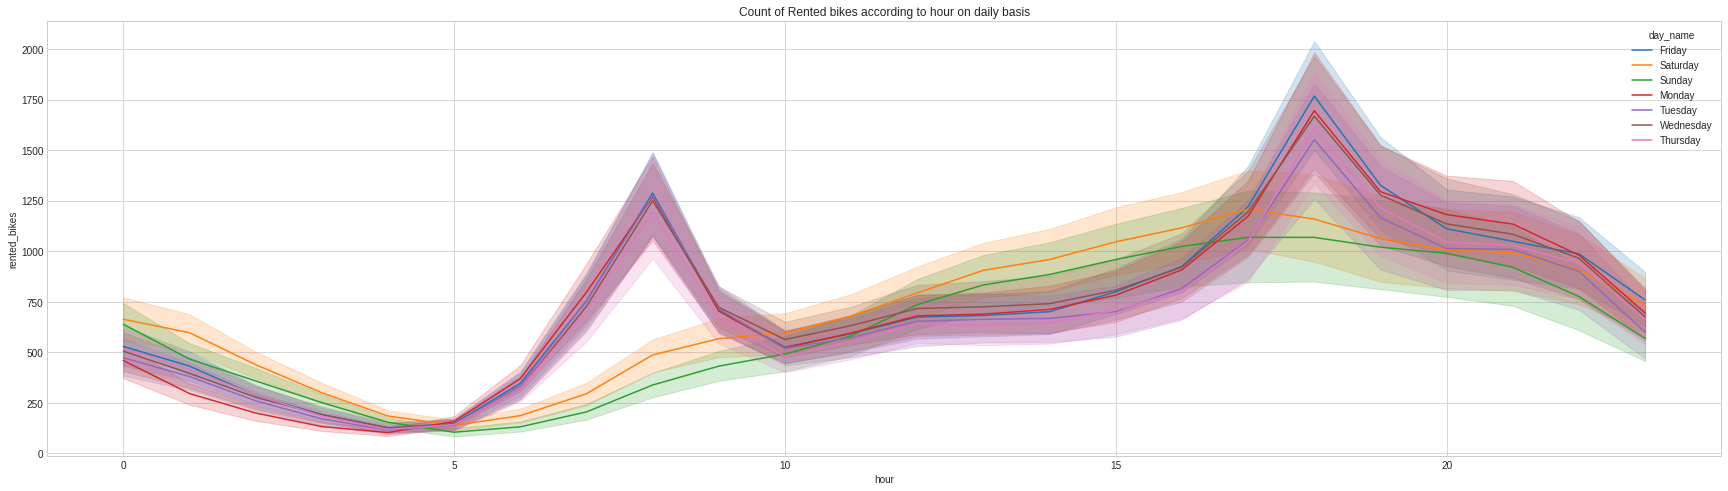

In [595]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(30,8))
sns.lineplot(data=df,x='hour',y='rented_bikes',hue='day_name',ax=ax)
ax.set(title='Count of Rented bikes according to hour on daily basis')

The above line graph is forming two pattern to depict Holiday and No Holiday, the bike rent during working hours i.e. between two peaks have higher during Holidays.

Peaks representing rush hours, first peak - when public going for work, second peak - when public returning from work.

[Text(0.5, 1.0, 'Count of Rented bikes according to hour on daily basis')]

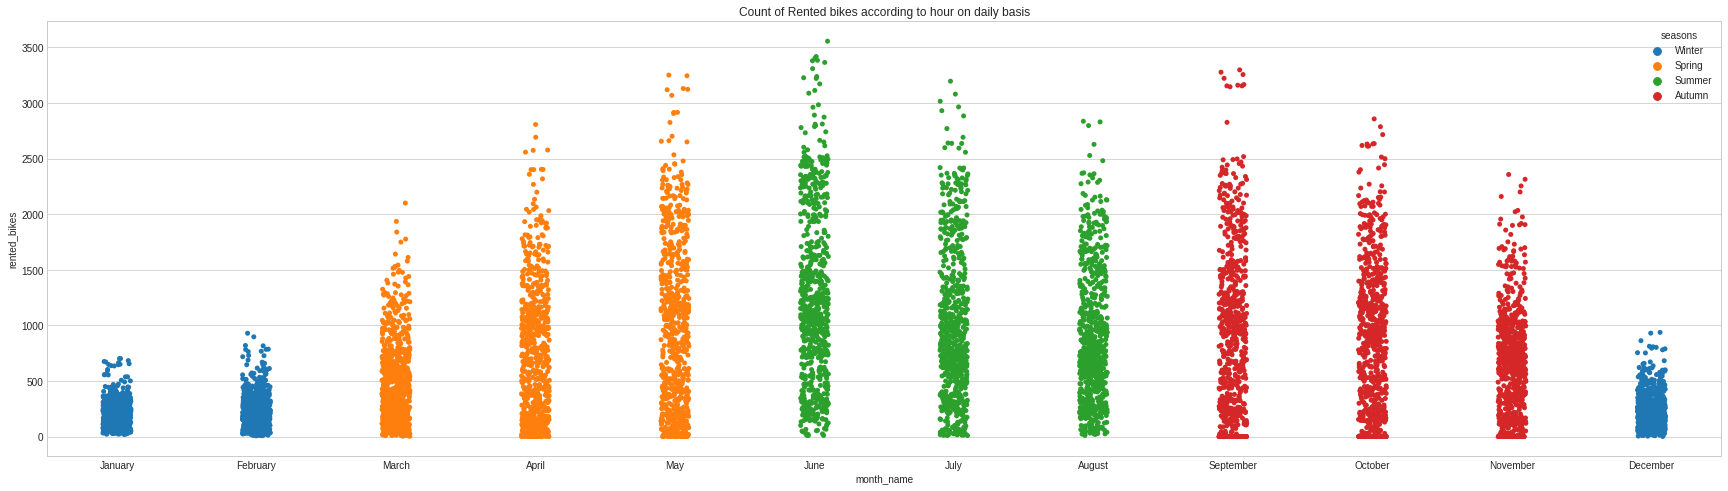

In [596]:
#looking into the month and seasons
fig,ax=plt.subplots(figsize=(30,8))
sns.stripplot(data=df.sort_values(by=['month']),x='month_name',y='rented_bikes',hue='seasons',ax=ax)
ax.set(title='Count of Rented bikes according to hour on daily basis')

since months and seasons have similarity we can drop 'seasons'



####Let's look into the pattern of the rented bikes on the basis of 'temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radition', 'rainfall', 'snowfall'

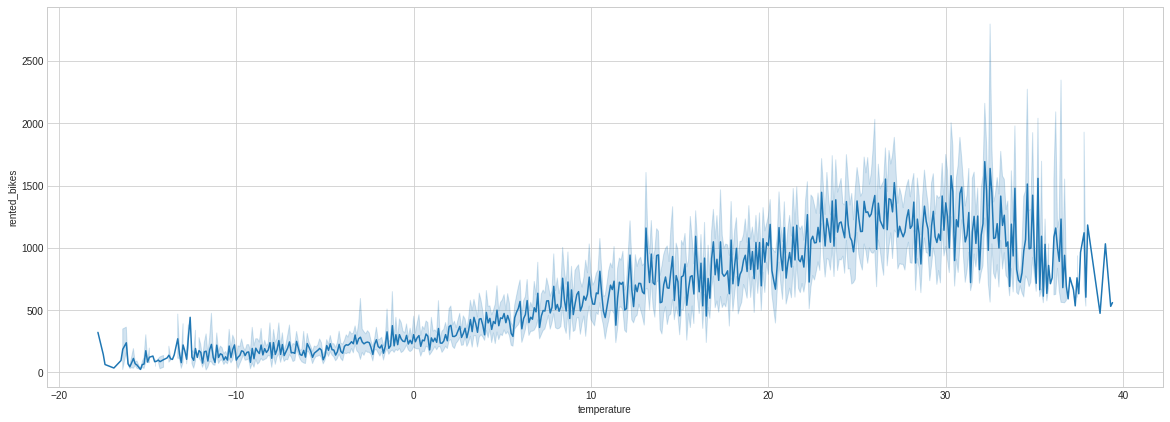

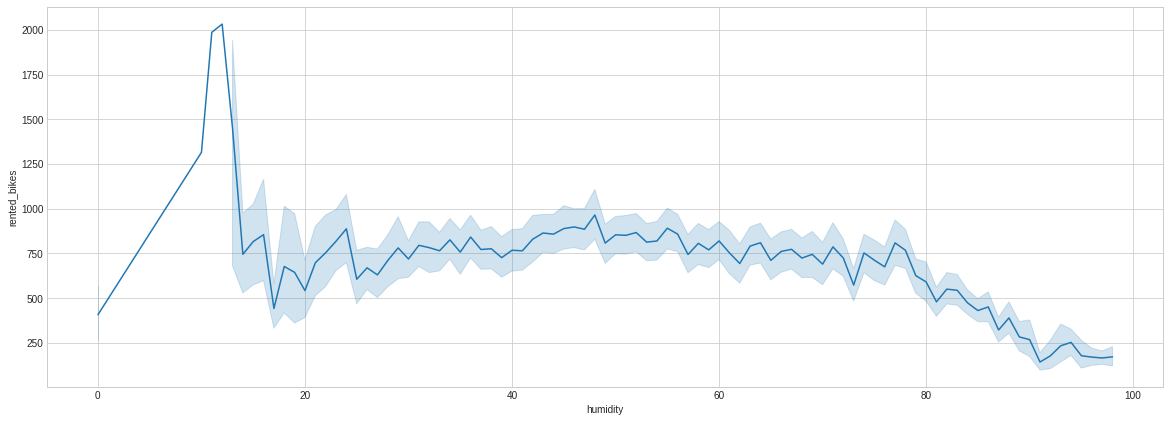

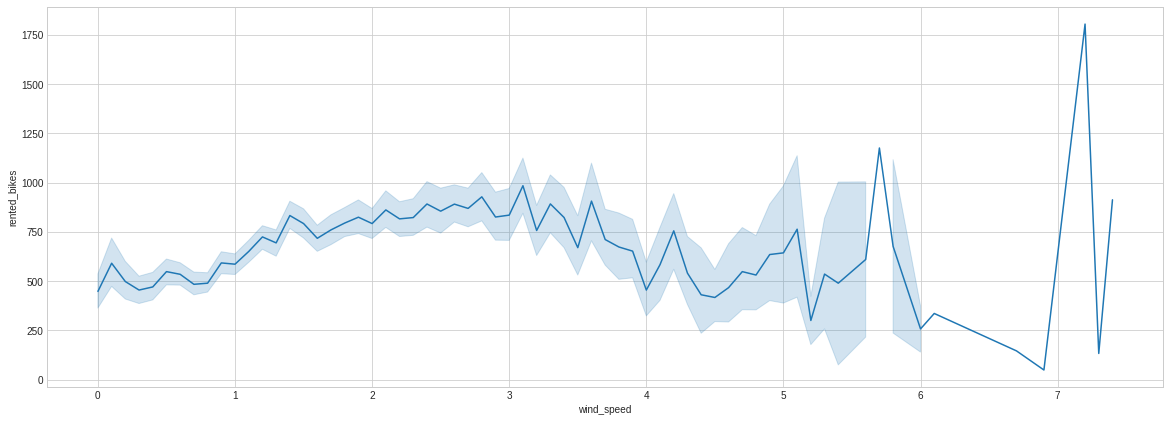

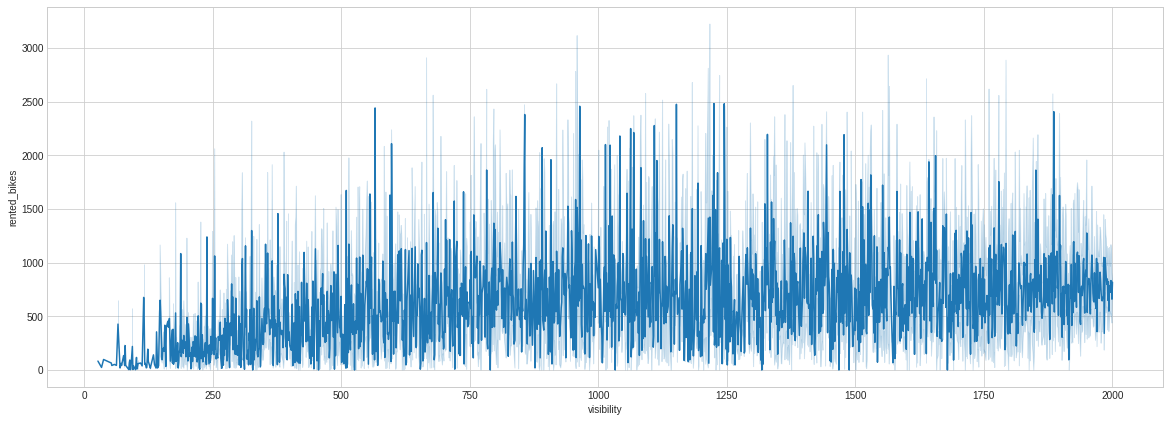

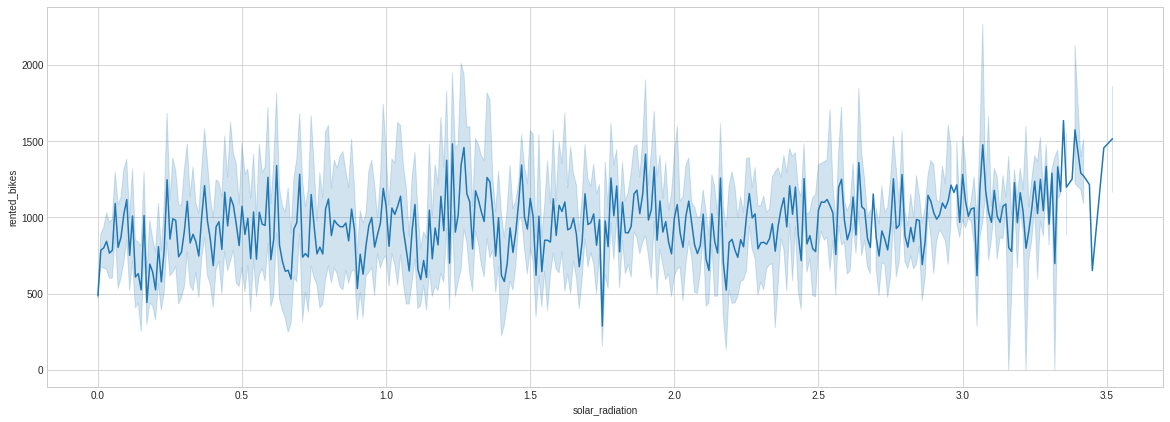

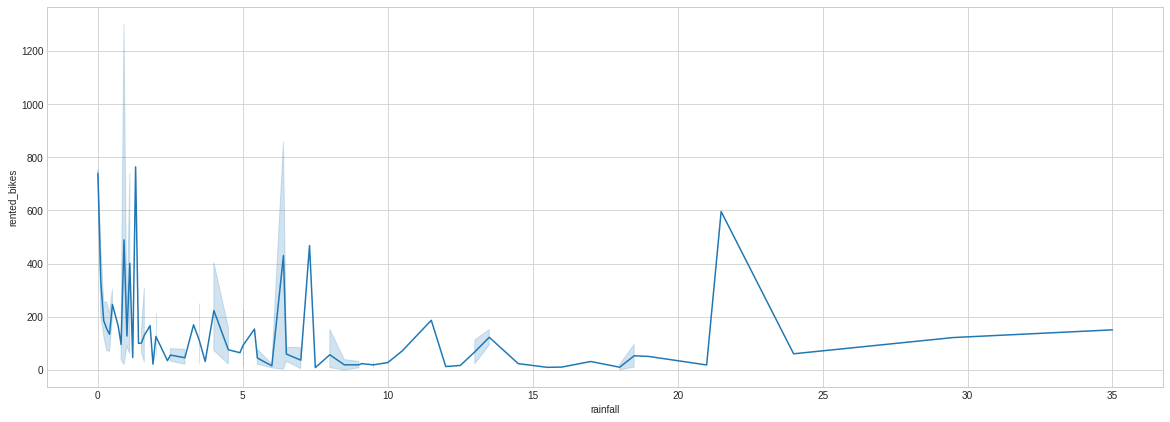

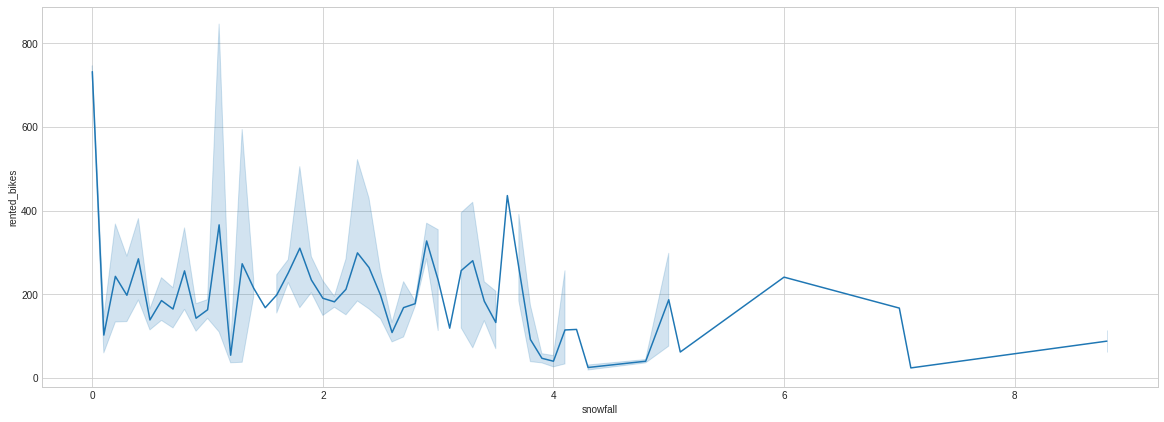

In [597]:
temp_list2 = ['temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']
for col in temp_list2:
  plt.figure(figsize=(20,7))
  plt.style.use('seaborn-whitegrid')
  plots = sns.lineplot(data=df,x=col,y='rented_bikes')

In [598]:
#Knowing the range of different numerical features
print("The Temperature is varying from",df['temperature'].min(),"c to", df['temperature'].max(), "c" )
print("The Humidity is varying from",df['humidity'].min(),"% to", df['humidity'].max(), "%" )
print("The Wind Speed is varying from",df['wind_speed'].min(),"m/s to", df['wind_speed'].max(), "m/s" )
print("The Visibility is varying from",df['visibility'].min(),"10m to", df['visibility'].max(), "10m" )
print("The Solar Radition is varying from",df['solar_radiation'].min(),"MJ/m2 to", df['solar_radiation'].max(), "MJ/m2" )
print("The Rainfall is varying from",df['rainfall'].min(),"mm to", df['rainfall'].max(), "mm" )
print("The Snowfall is varying from",df['snowfall'].min(),"cm to", df['snowfall'].max(), "cm" )

The Temperature is varying from -17.8 c to 39.4 c
The Humidity is varying from 0 % to 98 %
The Wind Speed is varying from 0.0 m/s to 7.4 m/s
The Visibility is varying from 27 10m to 2000 10m
The Solar Radition is varying from 0.0 MJ/m2 to 3.52 MJ/m2
The Rainfall is varying from 0.0 mm to 35.0 mm
The Snowfall is varying from 0.0 cm to 8.8 cm


##Feature Engineering

In [599]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week_num', 'week'],
      dtype='object')

Dropping 'year', 'month', 'day', 'day_name'

In [600]:
#we can drop a few columns- 'year','month','day','day_name'
df = df.drop(columns=['year','month','day','day_name','seasons','week_num'])

In [601]:
df

rented_bikes  hour  temperature  humidity  wind_speed  visibility  \
0              254     0         -5.2        37         2.2        2000   
1              204     1         -5.5        38         0.8        2000   
2              173     2         -6.0        39         1.0        2000   
3              107     3         -6.2        40         0.9        2000   
4               78     4         -6.0        36         2.3        2000   
...            ...   ...          ...       ...         ...         ...   
8755          1003    19          4.2        34         2.6        1894   
8756           764    20          3.4        37         2.3        2000   
8757           694    21          2.6        39         0.3        1968   
8758           712    22          2.1        41         1.0        1859   
8759           584    23          1.9        43         1.3        1909   

      solar_radiation  rainfall  snowfall     holiday functioning_day  \
0                 0.0       0.0       0.0  No Holiday             Yes   
1                 0.0       0.0       0.0  No Holiday             Yes   
2                 0.0       0.0       0.0  No Holiday             Yes   
3                 0.0       0.0       0.0  No Holiday             Yes   
4                 0.0       0.0       0.0  No Holiday             Yes   
...               ...       ...       ...         ...             ...   
8755              0.0       0.0       0.0  No Holiday             Yes   
8756              0.0       0.0       0.0  No Holiday             Yes   
8757              0.0       0.0       0.0  No Holiday             Yes   
8758              0.0       0.0       0.0  No Holiday             Yes   
8759              0.0       0.0       0.0  No Holiday             Yes   

     month_name     week  
0      December  weekday  
1      December  weekday  
2      December  weekday  
3      December  weekday  
4      December  weekday  
...         ...      ...  
8755   November  weekday  
8756   November  weekday  
8757   November  weekday  
8758   November  weekday  
8759   November  weekday  

[8760 rows x 13 columns]

In [602]:
#converting some features into categorical
categorical_columns=['hour', 'holiday', 'functioning_day','month_name','week']
for col in categorical_columns:
  df[col]=df[col].astype('category')

In [603]:
#Looking in functioning day and number of bikes rented to be zero
df[(df['rented_bikes']==0) & (df['functioning_day']=='No')]

rented_bikes hour  temperature  humidity  wind_speed  visibility  \
3144             0    0         14.4        82         4.6        1041   
3145             0    1         13.6        81         3.6         886   
3146             0    2         12.7        80         3.9         885   
3147             0    3         11.6        81         3.1         687   
3148             0    4         10.2        83         3.5         554   
...            ...  ...          ...       ...         ...         ...   
8251             0   19         11.9        71         2.7         589   
8252             0   20         11.9        72         2.5         526   
8253             0   21         11.4        74         1.9         498   
8254             0   22         11.2        75         1.7         478   
8255             0   23         10.9        76         1.2         456   

      solar_radiation  rainfall  snowfall     holiday functioning_day  \
3144              0.0       0.0       0.0  No Holiday              No   
3145              0.0       0.0       0.0  No Holiday              No   
3146              0.0       0.0       0.0  No Holiday              No   
3147              0.0       0.0       0.0  No Holiday              No   
3148              0.0       0.0       0.0  No Holiday              No   
...               ...       ...       ...         ...             ...   
8251              0.0       0.0       0.0  No Holiday              No   
8252              0.0       0.0       0.0  No Holiday              No   
8253              0.0       0.0       0.0  No Holiday              No   
8254              0.0       0.0       0.0  No Holiday              No   
8255              0.0       0.0       0.0  No Holiday              No   

     month_name     week  
3144      April  weekday  
3145      April  weekday  
3146      April  weekday  
3147      April  weekday  
3148      April  weekday  
...         ...      ...  
8251   November  weekday  
8252   November  weekday  
8253   November  weekday  
8254   November  weekday  
8255   November  weekday  

[295 rows x 13 columns]

In [604]:
#If zero bike rented on 'Yes' functioning day
df[(df['rented_bikes']==0) & (df['functioning_day']=='Yes')]

Empty DataFrame
Columns: [rented_bikes, hour, temperature, humidity, wind_speed, visibility, solar_radiation, rainfall, snowfall, holiday, functioning_day, month_name, week]
Index: []

In [605]:
#If any bike rented on non-functioning day
df[(df['rented_bikes']!=0) & (df['functioning_day']=='No')]

Empty DataFrame
Columns: [rented_bikes, hour, temperature, humidity, wind_speed, visibility, solar_radiation, rainfall, snowfall, holiday, functioning_day, month_name, week]
Index: []

Non Functioning day means no rental bikes, so we will drop 'functioning_day' column

In [606]:
df = df.drop(columns='functioning_day')

In [607]:
#dropping zero rental rows
df = df[df['rented_bikes']!=0]

In [608]:
df

rented_bikes hour  temperature  humidity  wind_speed  visibility  \
0              254    0         -5.2        37         2.2        2000   
1              204    1         -5.5        38         0.8        2000   
2              173    2         -6.0        39         1.0        2000   
3              107    3         -6.2        40         0.9        2000   
4               78    4         -6.0        36         2.3        2000   
...            ...  ...          ...       ...         ...         ...   
8755          1003   19          4.2        34         2.6        1894   
8756           764   20          3.4        37         2.3        2000   
8757           694   21          2.6        39         0.3        1968   
8758           712   22          2.1        41         1.0        1859   
8759           584   23          1.9        43         1.3        1909   

      solar_radiation  rainfall  snowfall     holiday month_name     week  
0                 0.0       0.0       0.0  No Holiday   December  weekday  
1                 0.0       0.0       0.0  No Holiday   December  weekday  
2                 0.0       0.0       0.0  No Holiday   December  weekday  
3                 0.0       0.0       0.0  No Holiday   December  weekday  
4                 0.0       0.0       0.0  No Holiday   December  weekday  
...               ...       ...       ...         ...        ...      ...  
8755              0.0       0.0       0.0  No Holiday   November  weekday  
8756              0.0       0.0       0.0  No Holiday   November  weekday  
8757              0.0       0.0       0.0  No Holiday   November  weekday  
8758              0.0       0.0       0.0  No Holiday   November  weekday  
8759              0.0       0.0       0.0  No Holiday   November  weekday  

[8465 rows x 12 columns]

####Oulier detection and treatment

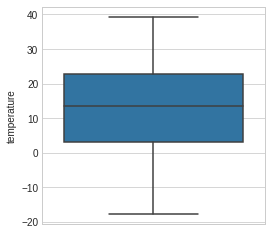

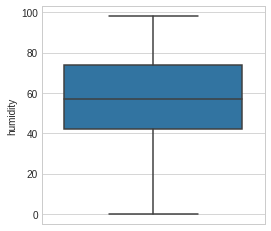

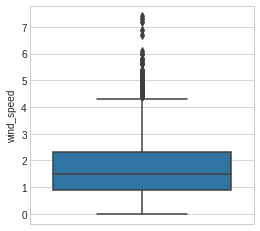

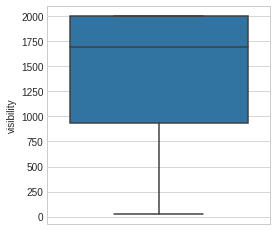

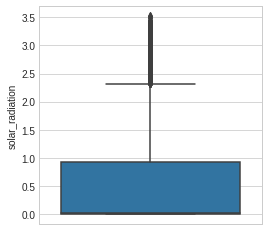

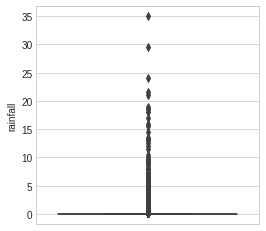

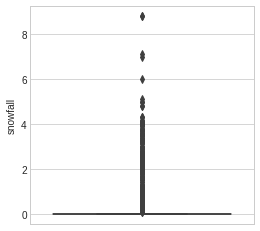

In [609]:
#Looking into the outlier in 'numerical_columns'
for col in numerical_columns:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=df[col])
  #fig.set_title('')
  fig.set_ylabel(col)

  plt.show()

'wind_speed', 'solar_radition', 'rainfall' and 'snowfall' have outliers

Before dealing with the outliers just look into the columns with outliers present in them

In [610]:
df['snowfall'].value_counts()

0.0    8022
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: snowfall, dtype: int64

here '0' means no snowfall

In [611]:
df['rainfall'].value_counts().sort_index()

0.0     7949
0.1       44
0.2       20
0.3        9
0.4       16
        ... 
21.0       1
21.5       1
24.0       1
29.5       1
35.0       1
Name: rainfall, Length: 61, dtype: int64

here 0 means no rainfall

In [612]:
df['solar_radiation'].value_counts()

0.00    4151
0.01     124
0.02      78
0.03      65
0.06      61
        ... 
2.97       1
3.22       1
3.44       1
3.49       1
3.45       1
Name: solar_radiation, Length: 345, dtype: int64

In [613]:
df['wind_speed'].value_counts().sort_index()

0.0     71
0.1     48
0.2     79
0.3    149
0.4    177
      ... 
6.7      1
6.9      1
7.2      1
7.3      1
7.4      1
Name: wind_speed, Length: 65, dtype: int64

In [614]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rented_bikes        870.00
temperature          19.70
humidity             32.00
wind_speed            1.40
visibility         1065.00
solar_radiation       0.93
rainfall              0.00
snowfall              0.00
dtype: float64


In [615]:
df['snowfall'].skew()

8.29283026085502

In [616]:
df[df['snowfall'] > df['snowfall'].quantile(0.99)]

rented_bikes hour  temperature  humidity  wind_speed  visibility  \
222              9    6         -0.5        90         0.9          91   
223             20    7         -0.4        92         1.1         121   
224             35    8         -0.2        90         1.2         378   
225             31    9          0.2        90         1.0         305   
226             19   10          0.5        91         0.4         143   
...            ...  ...          ...       ...         ...         ...   
8616           420    0          2.7        86         1.2         422   
8617           370    1          2.7        86         1.0         460   
8618           285    2          2.8        86         0.8         402   
8619           184    3          2.6        88         0.9         319   
8620           138    4          2.4        89         0.7         321   

      solar_radiation  rainfall  snowfall     holiday month_name     week  
222               0.0       2.5       2.7  No Holiday   December  weekend  
223               0.0       0.0       4.0  No Holiday   December  weekend  
224               0.0       0.0       4.1  No Holiday   December  weekend  
225               0.0       1.6       4.3  No Holiday   December  weekend  
226               0.0       0.0       4.3  No Holiday   December  weekend  
...               ...       ...       ...         ...        ...      ...  
8616              0.0       0.0       3.0  No Holiday   November  weekend  
8617              0.0       0.0       2.9  No Holiday   November  weekend  
8618              0.0       0.0       2.9  No Holiday   November  weekend  
8619              0.0       0.0       2.8  No Holiday   November  weekend  
8620              0.0       0.0       2.6  No Holiday   November  weekend  

[81 rows x 12 columns]

In [617]:
df[df['rainfall'] == df['rainfall'].max()]

rented_bikes hour  temperature  humidity  wind_speed  visibility  \
3997           151   13         21.8        97         2.4         682   

      solar_radiation  rainfall  snowfall     holiday month_name     week  
3997             0.06      35.0       0.0  No Holiday        May  weekday

In [618]:
df[df['rainfall'] >0.0].quantile(0.99)

rented_bikes       1198.400
temperature          29.870
humidity             98.000
wind_speed            4.985
visibility         2000.000
solar_radiation       0.890
rainfall             18.925
snowfall              3.925
Name: 0.99, dtype: float64

In [619]:
df[df['snowfall'] >0.0].quantile(0.99)

rented_bikes        808.3800
temperature           8.1700
humidity             97.0000
wind_speed            4.8000
visibility         2000.0000
solar_radiation       1.3448
rainfall              1.7160
snowfall              5.6220
Name: 0.99, dtype: float64

The 99th percentile of the non-zero values of 'rainfall' and 'snowfall' are 18.9 and 5.6 repectively. We will replace the values which are above those with these upper limits. 

In [620]:
#Replacing the large values of Rainfall
df['rainfall'] = df['rainfall'].apply(lambda x: 18.9 if x>18.9 else x)

In [621]:
df['rainfall'].value_counts()

0.0     7949
0.5      114
1.0       64
1.5       55
0.1       44
2.0       30
2.5       22
0.2       20
3.5       18
0.4       16
3.0       14
4.0       14
0.3        9
5.5        8
4.5        6
18.9       6
6.0        6
9.5        6
6.5        5
5.0        5
9.0        4
1.6        3
8.0        3
7.0        3
0.9        3
0.8        3
6.4        2
18.5       2
13.0       2
13.5       2
1.1        2
1.9        1
12.0       1
9.1        1
18.0       1
1.2        1
3.3        1
15.5       1
1.3        1
7.3        1
8.5        1
7.5        1
1.4        1
4.9        1
0.7        1
14.5       1
16.0       1
10.5       1
5.4        1
11.5       1
12.5       1
10.0       1
3.7        1
17.0       1
2.4        1
1.8        1
Name: rainfall, dtype: int64

In [622]:
#Replacing the large values of snowfall
df['snowfall'] = df['snowfall'].apply(lambda x: 5.6 if x>5.6 else x)

In [623]:
df['snowfall'].max()

5.6

In [624]:
df['snowfall'].value_counts()

0.0    8022
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
5.6       5
4.0       4
4.1       4
3.2       4
1.3       4
3.3       3
3.7       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
2.8       2
5.0       2
0.1       2
4.8       2
1.4       2
3.9       2
4.3       2
2.9       2
4.2       1
5.1       1
1.5       1
3.1       1
3.6       1
Name: snowfall, dtype: int64

In [625]:
#Now looking into 'wind_speed' column
df['wind_speed'].max()

7.4

7.4 m/s wind speed is reasonable, it is not a rare event

In [626]:
#Now looking into the 'solar_radiation' column
df['solar_radiation'].max()

3.52

3.52 MJ/m2 is a possible solar radiation value

In [627]:
df.quantile(0.99)

rented_bikes       2556.36
temperature          35.20
humidity             97.00
wind_speed            4.70
visibility         2000.00
solar_radiation       3.17
rainfall              4.00
snowfall              2.50
Name: 0.99, dtype: float64

####Looking into the dependent feature i.e. 'rented_bikes'

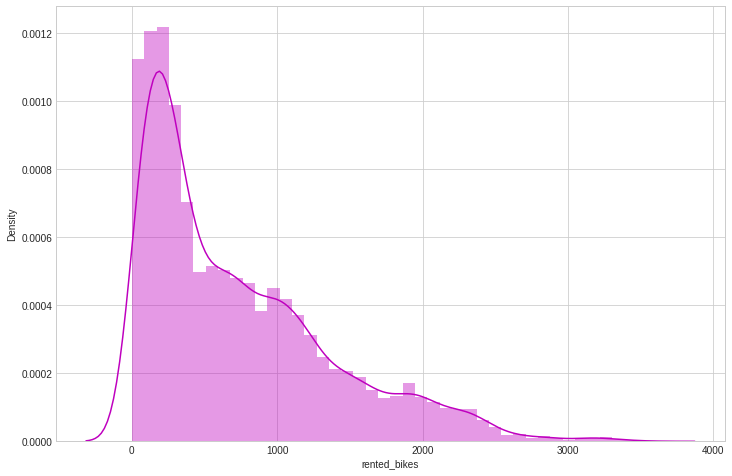

In [628]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
sns.distplot(df['rented_bikes'],color="m")
plt.show()

Right Skewed

In [629]:
df['rented_bikes'].skew()

1.1397000550865888

In [630]:
np.sqrt(df['rented_bikes']).skew()

0.34670341483191813

In [631]:
np.log(df['rented_bikes']).skew()

-0.803925612836001

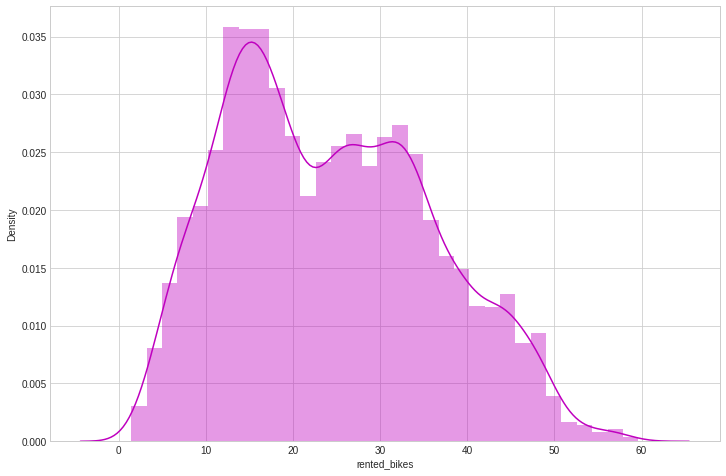

In [632]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
sns.distplot(np.sqrt(df['rented_bikes']),color="m")
plt.show()

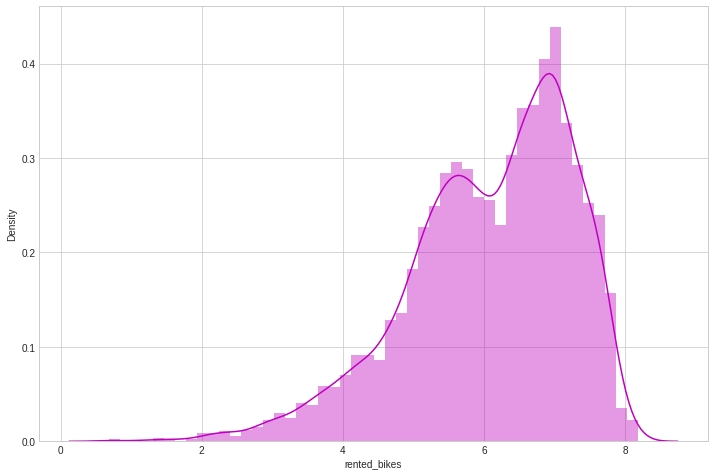

In [633]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
sns.distplot(np.log(df['rented_bikes']),color="m")
plt.show()

'Square root' transformation working better compare to 'Log' transformation

In [634]:
#Creating a copy
df_copy = df.copy()

In [635]:
df_copy

rented_bikes hour  temperature  humidity  wind_speed  visibility  \
0              254    0         -5.2        37         2.2        2000   
1              204    1         -5.5        38         0.8        2000   
2              173    2         -6.0        39         1.0        2000   
3              107    3         -6.2        40         0.9        2000   
4               78    4         -6.0        36         2.3        2000   
...            ...  ...          ...       ...         ...         ...   
8755          1003   19          4.2        34         2.6        1894   
8756           764   20          3.4        37         2.3        2000   
8757           694   21          2.6        39         0.3        1968   
8758           712   22          2.1        41         1.0        1859   
8759           584   23          1.9        43         1.3        1909   

      solar_radiation  rainfall  snowfall     holiday month_name     week  
0                 0.0       0.0       0.0  No Holiday   December  weekday  
1                 0.0       0.0       0.0  No Holiday   December  weekday  
2                 0.0       0.0       0.0  No Holiday   December  weekday  
3                 0.0       0.0       0.0  No Holiday   December  weekday  
4                 0.0       0.0       0.0  No Holiday   December  weekday  
...               ...       ...       ...         ...        ...      ...  
8755              0.0       0.0       0.0  No Holiday   November  weekday  
8756              0.0       0.0       0.0  No Holiday   November  weekday  
8757              0.0       0.0       0.0  No Holiday   November  weekday  
8758              0.0       0.0       0.0  No Holiday   November  weekday  
8759              0.0       0.0       0.0  No Holiday   November  weekday  

[8465 rows x 12 columns]

In [636]:
numerical_columns

['temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'solar_radiation',
 'rainfall',
 'snowfall']

####Scattered Plots of numerical features with 'Linear Regression' line to represent the relation with dependent feature or target featrure i.e. 'rented_bikes'

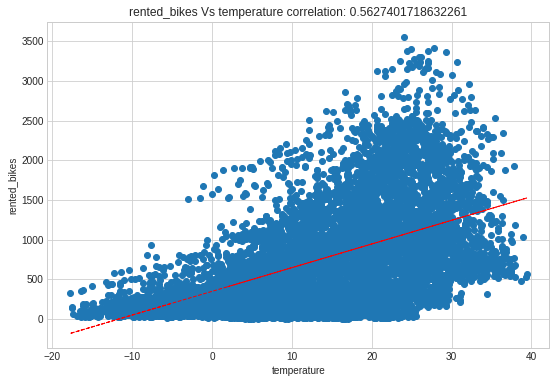

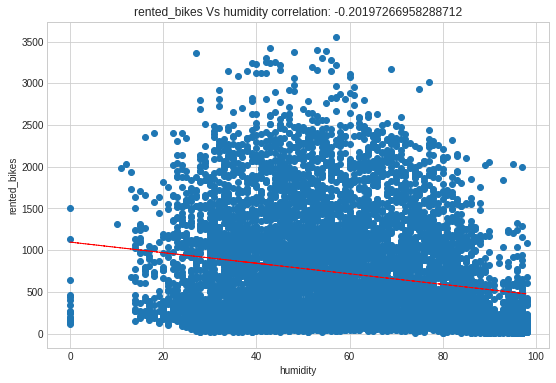

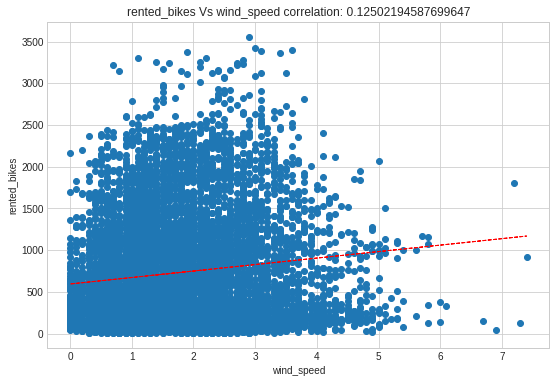

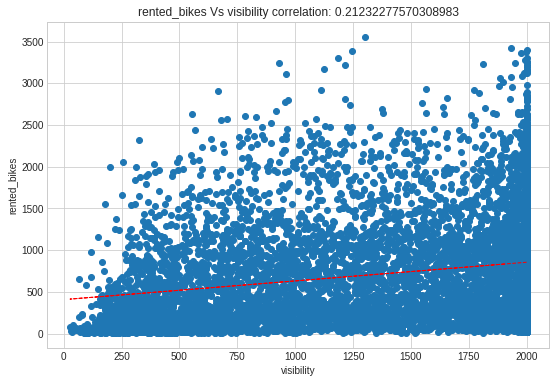

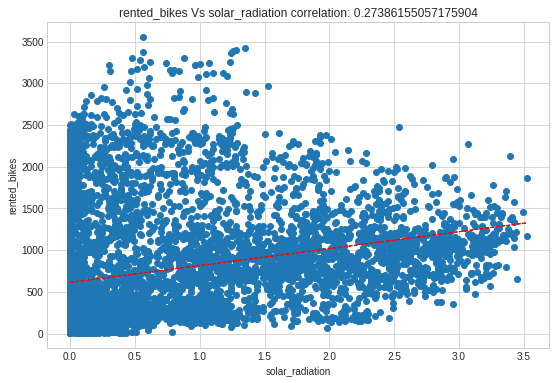

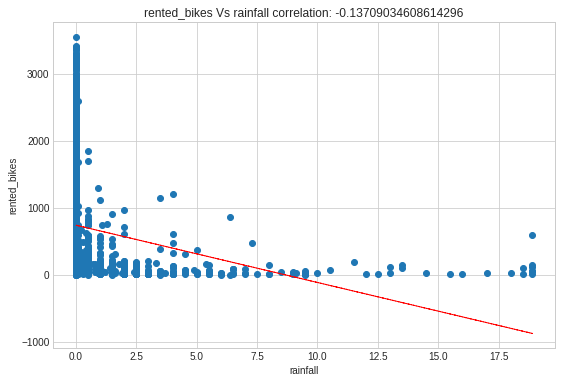

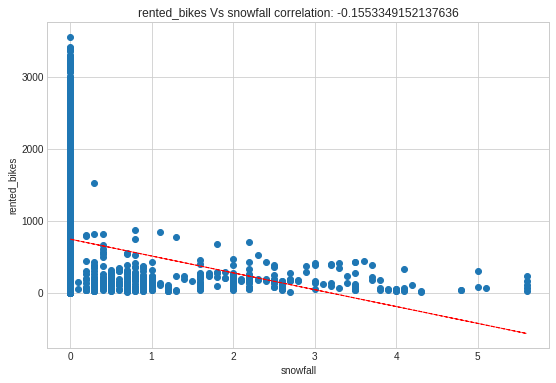

In [637]:
for col in numerical_columns:
  if col not in ['rented_bikes']:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=df_copy[col]
    label=df_copy['rented_bikes']
    correlation=feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('rented_bikes')
    ax.set_title('rented_bikes Vs '+col + ' correlation: ' + str(correlation) )
    z=np.polyfit(feature,label,1)
    y_hat=np.poly1d(z)(df_copy[col])

    plt.plot(df_copy[col],y_hat,"r--",lw=1)

  plt.show()

####Encoding 'week' and 'holiday' columns

In [638]:
df_copy['holiday'].value_counts()

No Holiday    8057
Holiday        408
Name: holiday, dtype: int64

In [639]:
df_copy['week'] = df_copy['week'].apply(lambda x: 0 if x=='weekend' else 1)
df_copy['holiday'] = df_copy['holiday'].apply(lambda x: 0 if x=='Holiday' else 1)

####Heat Map

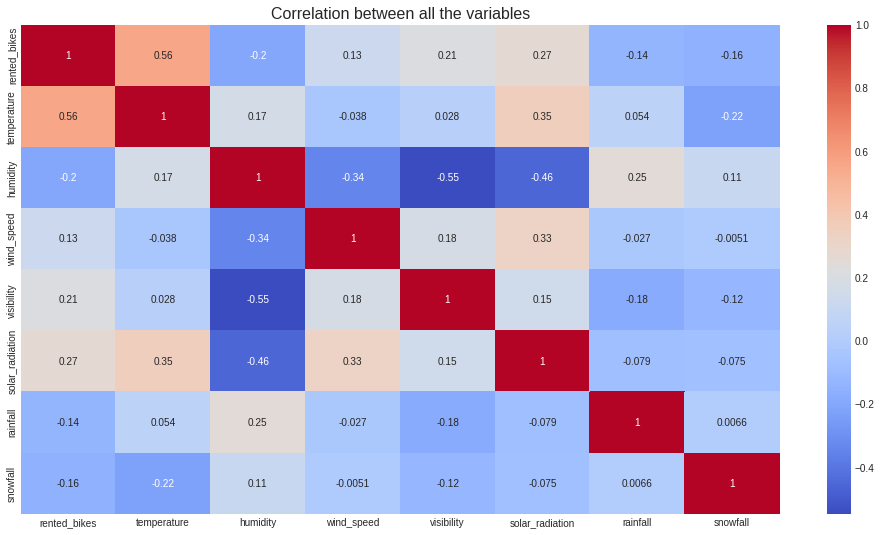

In [640]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the variables', size=16)
plt.show()

####VIF (Variance Inflation Factor)

In [641]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [642]:
calc_vif(df_copy[[i for i in df_copy.describe().columns if i not in ['rented_bikes']] ] )

variables       VIF
0      temperature  3.114592
1         humidity  4.755414
2       wind_speed  4.089572
3       visibility  4.420319
4  solar_radiation  2.234320
5         rainfall  1.090627
6         snowfall  1.127594

VIF (Variance Inflation Factor) < 5

In [643]:
df_copy.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'holiday',
       'month_name', 'week'],
      dtype='object')

Final features we have.

####OneHotEncoding and Heat Map

In [644]:
#OneHotEncoding
df_copy = pd.get_dummies(df_copy, columns=['hour','month_name'])

In [645]:
df_copy

rented_bikes  temperature  humidity  wind_speed  visibility  \
0              254         -5.2        37         2.2        2000   
1              204         -5.5        38         0.8        2000   
2              173         -6.0        39         1.0        2000   
3              107         -6.2        40         0.9        2000   
4               78         -6.0        36         2.3        2000   
...            ...          ...       ...         ...         ...   
8755          1003          4.2        34         2.6        1894   
8756           764          3.4        37         2.3        2000   
8757           694          2.6        39         0.3        1968   
8758           712          2.1        41         1.0        1859   
8759           584          1.9        43         1.3        1909   

      solar_radiation  rainfall  snowfall holiday week  ...  \
0                 0.0       0.0       0.0       1    1  ...   
1                 0.0       0.0       0.0       1    1  ...   
2                 0.0       0.0       0.0       1    1  ...   
3                 0.0       0.0       0.0       1    1  ...   
4                 0.0       0.0       0.0       1    1  ...   
...               ...       ...       ...     ...  ...  ...   
8755              0.0       0.0       0.0       1    1  ...   
8756              0.0       0.0       0.0       1    1  ...   
8757              0.0       0.0       0.0       1    1  ...   
8758              0.0       0.0       0.0       1    1  ...   
8759              0.0       0.0       0.0       1    1  ...   

      month_name_December  month_name_February  month_name_January  \
0                       1                    0                   0   
1                       1                    0                   0   
2                       1                    0                   0   
3                       1                    0                   0   
4                       1                    0                   0   
...                   ...                  ...                 ...   
8755                    0                    0                   0   
8756                    0                    0                   0   
8757                    0                    0                   0   
8758                    0                    0                   0   
8759                    0                    0                   0   

      month_name_July  month_name_June  month_name_March  month_name_May  \
0                   0                0                 0               0   
1                   0                0                 0               0   
2                   0                0                 0               0   
3                   0                0                 0               0   
4                   0                0                 0               0   
...               ...              ...               ...             ...   
8755                0                0                 0               0   
8756                0                0                 0               0   
8757                0                0                 0               0   
8758                0                0                 0               0   
8759                0                0                 0               0   

      month_name_November  month_name_October  month_name_September  
0                       0                   0                     0  
1                       0                   0                     0  
2                       0                   0                     0  
3                       0                   0                     0  
4                       0                   0                     0  
...                   ...                 ...                   ...  
8755                    1                   0                     0  
8756                    1                   0                     0  
8757                    1           

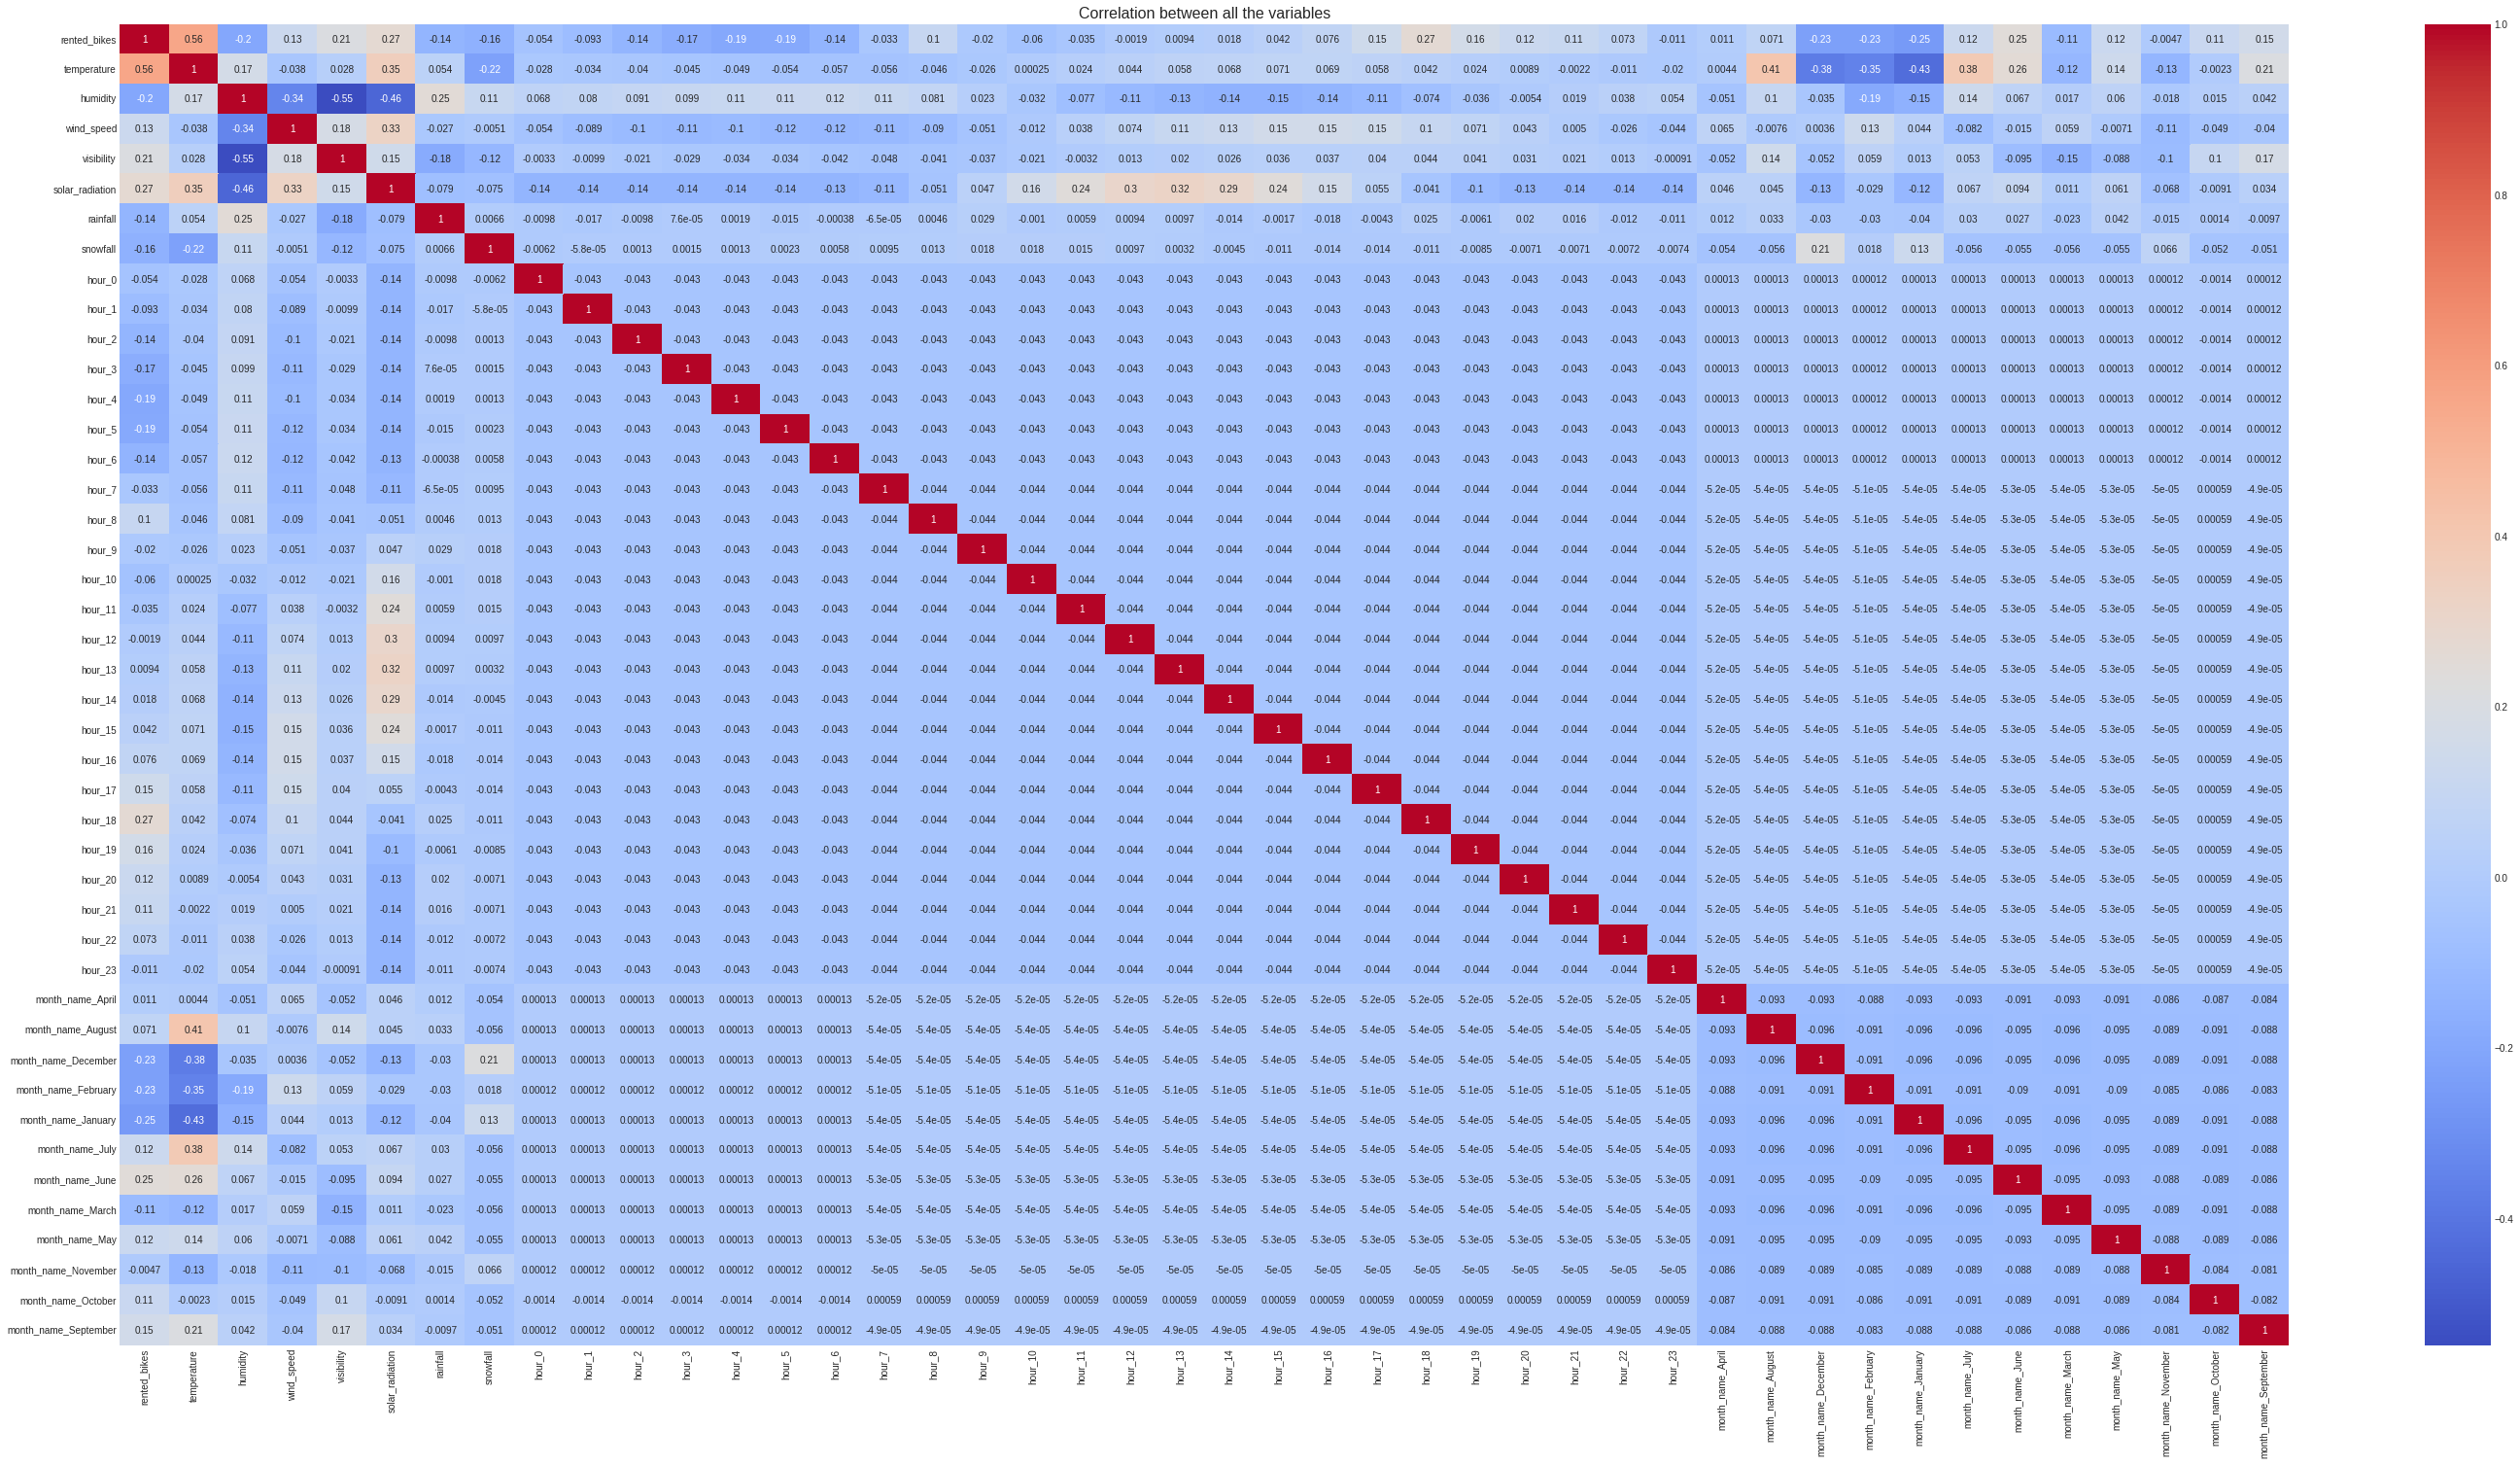

In [646]:
#Heatmap for co-relation in features
plt.figure(figsize=(50, 25))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the variables', size=16)
plt.show()

#Algorithm Implementation

In [647]:
y = np.sqrt(df_copy['rented_bikes'])
X = df_copy.drop(columns = ['rented_bikes'])

In [648]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6772, 45)
(1693, 45)


In [649]:
X_train[0:10]

temperature  humidity  wind_speed  visibility  solar_radiation  \
843          -5.5        56         1.1        1453             0.00   
1705          1.7        71         1.2         584             0.00   
7033         20.0        59         1.1        1999             0.00   
3655         17.6        94         0.5         166             0.00   
5679         34.0        50         3.0        1705             1.72   
2702         12.4        33         2.9         811             2.71   
6122         28.1        78         0.9        1191             0.00   
8186         12.0        81         1.3         295             0.00   
1051         -3.3        76         0.8         633             0.00   
4779         20.5        77         0.5         865             0.00   

      rainfall  snowfall holiday week  hour_0  ...  month_name_December  \
843        0.0       0.0       1    1       0  ...                    0   
1705       0.0       0.0       1    0       0  ...                    0   
7033       0.0       0.0       1    1       0  ...                    0   
3655       1.0       0.0       1    1       0  ...                    0   
5679       0.0       0.0       1    1       0  ...                    0   
2702       0.0       0.0       1    1       0  ...                    0   
6122       0.0       0.0       1    1       0  ...                    0   
8186       0.0       0.0       1    1       0  ...                    0   
1051       0.0       0.0       1    0       0  ...                    0   
4779       0.0       0.0       1    1       0  ...                    0   

      month_name_February  month_name_January  month_name_July  \
843                     0                   1                0   
1705                    1                   0                0   
7033                    0                   0                0   
3655                    0                   0                0   
5679                    0                   0                1   
2702                    0                   0                0   
6122                    0                   0                0   
8186                    0                   0                0   
1051                    0                   1                0   
4779                    0                   0                0   

      month_name_June  month_name_March  month_name_May  month_name_November  \
843                 0                 0               0                    0   
1705                0                 0               0                    0   
7033                0                 0               0                    0   
3655                0                 0               1                    0   
5679                0                 0               0                    0   
2702                0                 1               0                    0   
6122                0                 0               0                    0   
8186                0                 0               0                    1   
1051                0                 0               0                    0   
4779                1                 0               0                    0   

      month_name_October  month_name_September  
843                    0                     0  
1705                   0                     0  
7033                   0                     1  
3655                   0                     0  
5679                   0                     0  
2702                   0                     0  
6122                   0                     0  
8186                   0                     0  
1051                   0                     0  
4779                   0                     0  

[10 rows x 45 columns]

In [650]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [651]:
X_train[0:10]

array([[0.21089631, 0.57142857, 0.14864865, 0.72275722, 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33743409, 0.7244898 , 0.16216216, 0.2823112 , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

##Linear Regression

In [652]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [653]:
regressor.intercept_

2536242510377.834

In [654]:
regressor.coef_

array([ 2.87735170e+01, -1.26738984e+01, -5.96061148e-01,  1.46523846e+00,
        2.67683174e+00, -3.72686512e+01, -1.42356964e-01,  3.16683590e+00,
        1.50928774e+00, -1.44872660e+12, -1.44872660e+12, -1.44872660e+12,
       -1.44872660e+12, -1.44872660e+12, -1.44872660e+12, -1.44872660e+12,
       -1.44872660e+12, -1.44872660e+12, -1.44872660e+12, -1.44872660e+12,
       -1.44872660e+12, -1.44872660e+12, -1.44872660e+12, -1.44872660e+12,
       -1.44872660e+12, -1.44872660e+12, -1.44872660e+12, -1.44872660e+12,
       -1.44872660e+12, -1.44872660e+12, -1.44872660e+12, -1.44872660e+12,
       -1.44872660e+12, -1.08751591e+12, -1.08751591e+12, -1.08751591e+12,
       -1.08751591e+12, -1.08751591e+12, -1.08751591e+12, -1.08751591e+12,
       -1.08751591e+12, -1.08751591e+12, -1.08751591e+12, -1.08751591e+12,
       -1.08751591e+12])

In [655]:
regressor.score(X_train,y_train)

0.7706704208725111

In [656]:
regressor.score(X_test,y_test)

0.7384722774087562

In [657]:
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)

In [658]:
#train
MSE  = mean_squared_error((y_train)**2,(y_pred_train)**2)
print("MSE:" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE:" ,RMSE)
r2 = r2_score((y_train)**2, (y_pred_train)**2)
print("R2:" ,r2)
print("Adjusted R2:",1-(1-r2_score((y_train)**2, (y_pred_train)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE: 99069.50439530524
RMSE: 314.75308480665484
R2: 0.762595537317746
Adjusted R2: 0.7610071934550191


In [659]:
#test
MSE  = mean_squared_error((y_test)**2,(y_pred_test)**2)
print("MSE:" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE:" ,RMSE)
r2 = r2_score((y_test)**2, (y_pred_test)**2)
print("R2:" ,r2)
print("Adjusted R2:",1-(1-r2_score((y_test)**2, (y_pred_test)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 102741.71503300496
RMSE: 320.5334850417425
R2: 0.7385843663714236
Adjusted R2: 0.7314418627203696


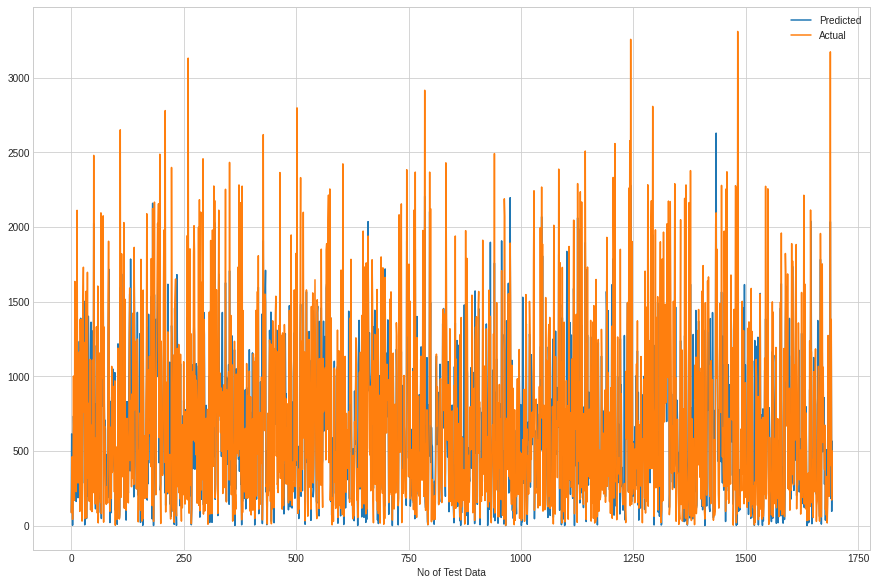

In [660]:
#Plot the figure - Test
plt.figure(figsize=(15,10))
plt.plot(y_pred_test*y_pred_test)
plt.plot(np.array(y_test*y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##Lasso Regression

In [661]:
lasso  = Lasso(alpha=1e-05 , max_iter= 5000)

lasso.fit(X_train, y_train)

Lasso(alpha=1e-05, max_iter=5000)

In [662]:
lasso.score(X_train, y_train) 

0.7706702799125905

In [663]:
y_pred_test_l = lasso.predict(X_test)
y_pred_train_l = lasso.predict(X_train)

In [664]:
#Train
MSE  = mean_squared_error((y_train)**2, (y_pred_train_l)**2)
print("MSE:" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE:" ,RMSE)

r2 = r2_score((y_train)**2, (y_pred_train_l)**2)
print("R2:" ,r2)
print("Adjusted R2:",1-(1-r2_score((y_train)**2, (y_pred_train_l)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE: 99067.85547873593
RMSE: 314.7504654146455
R2: 0.7625994886865808
Adjusted R2: 0.761011171260309


In [665]:
#Test
MSE  = mean_squared_error((y_test)**2, (y_pred_test_l)**2)
print("MSE:" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE:" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_test_l)**2)
print("R2:" ,r2)
print("Adjusted R2:",1-(1-r2_score((y_test)**2, (y_pred_test_l)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 102741.58076171127
RMSE: 320.5332755919598
R2: 0.7385847080107986
Adjusted R2: 0.7314422136941536


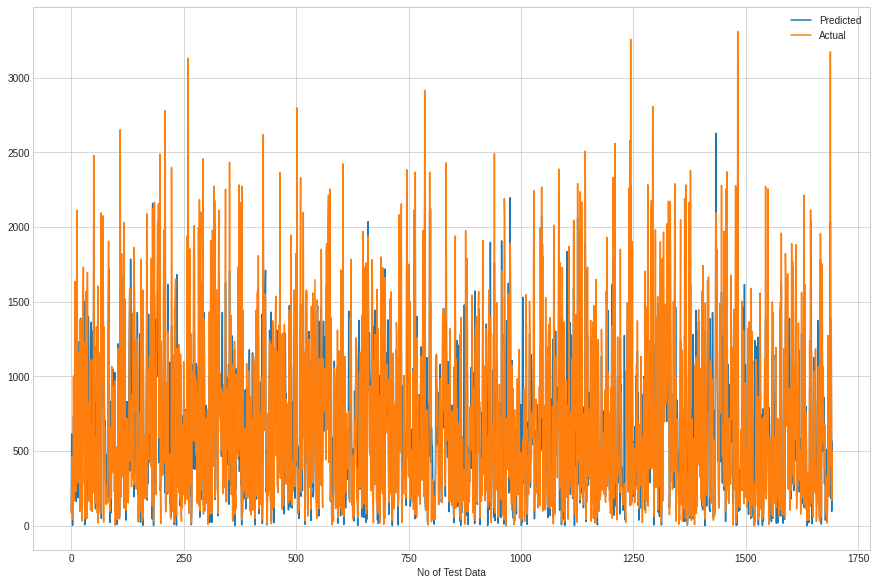

In [666]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_l**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##Ridge Regularization

In [667]:
ridge=Ridge(alpha=1e-05,max_iter=5000)
ridge.fit(X_train,y_train)

Ridge(alpha=1e-05, max_iter=5000)

In [668]:
ridge.score(X_train,y_train)

0.7706702810198423

In [669]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [670]:
#Train
MSE  = mean_squared_error((y_train)**2, (y_pred_train_ridge)**2)
print("MSE:" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE:" ,RMSE)

r2 = r2_score((y_train)**2, (y_pred_train_ridge)**2)
print("R2:" ,r2)
print("Adjusted R2:",1-(1-r2_score((y_train)**2, (y_pred_train_ridge)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE: 99065.69420758593
RMSE: 314.7470320870173
R2: 0.7626046678324664
Adjusted R2: 0.7610163850570368


In [671]:
#Test
MSE  = mean_squared_error((y_test)**2, (y_pred_test_ridge)**2)
print("MSE:" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE:" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_test_ridge)**2)
print("R2:" ,r2)
print("Adjusted R2:",1-(1-r2_score((y_test)**2, (y_pred_test_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 102740.41319566574
RMSE: 320.5314542999887
R2: 0.7385876787614571
Adjusted R2: 0.731445265612863


In [672]:
#Cross Validation and hyper parameter tuning
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=4)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(alpha=1e-05, max_iter=5000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [673]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -33.01527383425905


In [674]:
y_pred_ridge_cv=ridge_regressor.predict(X_test)

In [675]:
MSE  = mean_squared_error ( (y_test)**2, (y_pred_ridge_cv)**2 )
print("MSE:" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE:" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_ridge_cv)**2)
print("R2:" ,r2)
print("Adjusted R2:",1-(1-r2_score((y_test)**2, (y_pred_ridge_cv)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 102785.6069512337
RMSE: 320.60194470906396
R2: 0.7384726879396273
Adjusted R2: 0.7313271329653002


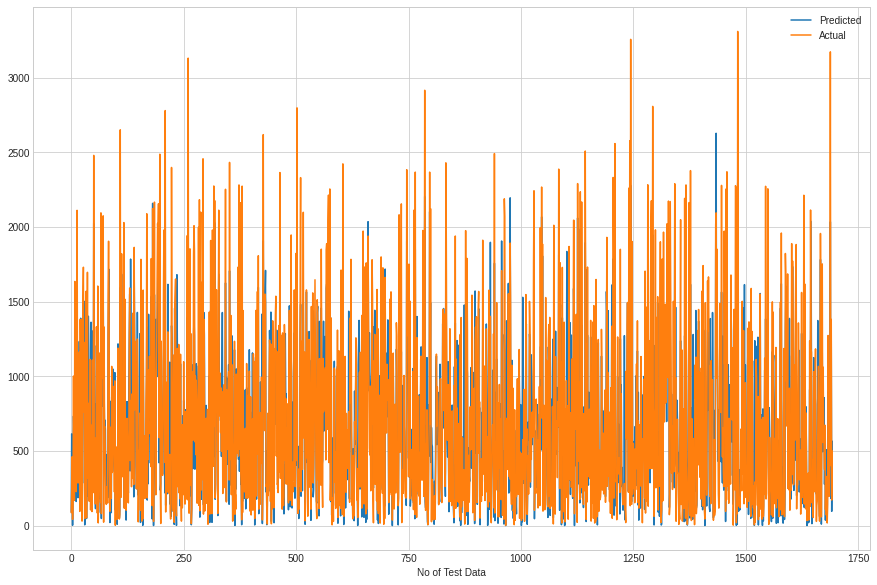

In [676]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_ridge_cv**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##Random Forest

In [677]:
#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 100, random_state=5)
#training the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=5)

In [678]:
rf_reg.score(X_train,y_train)

0.9885313388350202

In [679]:
pred_train_rf = rf_reg.predict(X_train)
pred_test_rf = rf_reg.predict(X_test)

In [680]:
#Train
MSE_train = mean_squared_error(y_train**2, pred_train_rf**2)
print(f'MSE: {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE: {RMSE_train}')

R2_Score_train = r2_score(y_train**2, pred_train_rf**2)
print(f'R2_Score: {R2_Score_train}')
print("Adjusted R2:",1-(1-r2_score((y_train)**2, (pred_train_rf)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE: 4598.6123841847875
RMSE: 67.81306942016994
R2_Score: 0.9889801497563252
Adjusted R2: 0.9889064219447038


In [681]:
#Test
MSE_test = mean_squared_error(y_test**2, pred_test_rf**2)
print(f'MSE: {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE: {RMSE_test}')

R2_Score_test = r2_score(y_test**2, pred_test_rf**2)
print(f'R2_Score: {R2_Score_test}')
print("Adjusted R2:",1-(1-r2_score((y_test)**2, (pred_test_rf)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 42839.722379743296
RMSE: 206.97758907607195
R2_Score: 0.8909987713678391
Adjusted R2: 0.8880205957221516


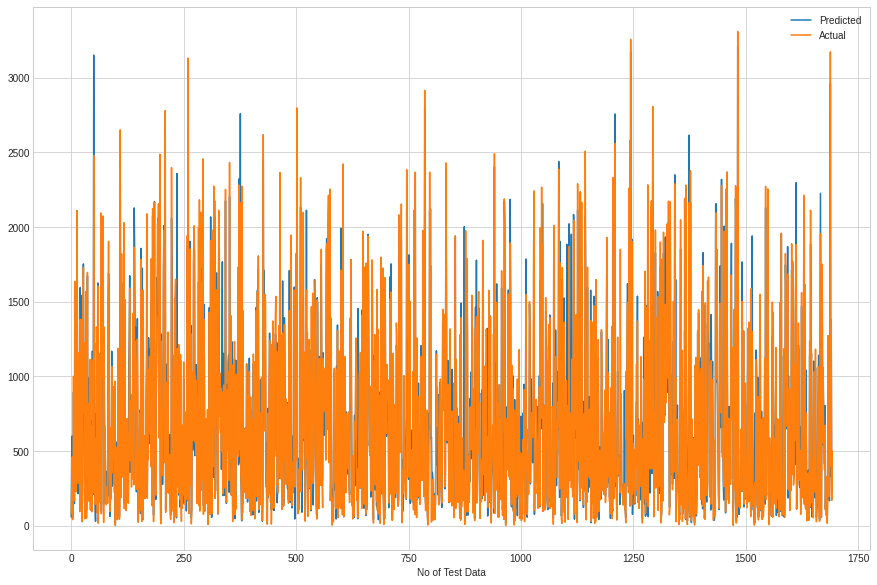

In [682]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(pred_test_rf**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

###Regression Models: Final Summary

On Train Dataset
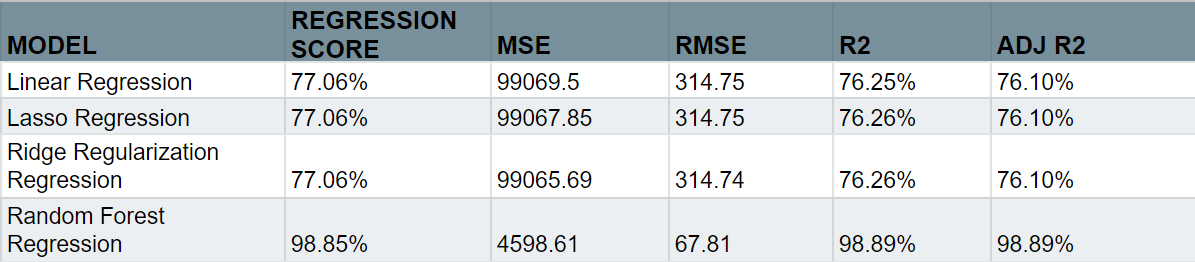

On Test Dataset
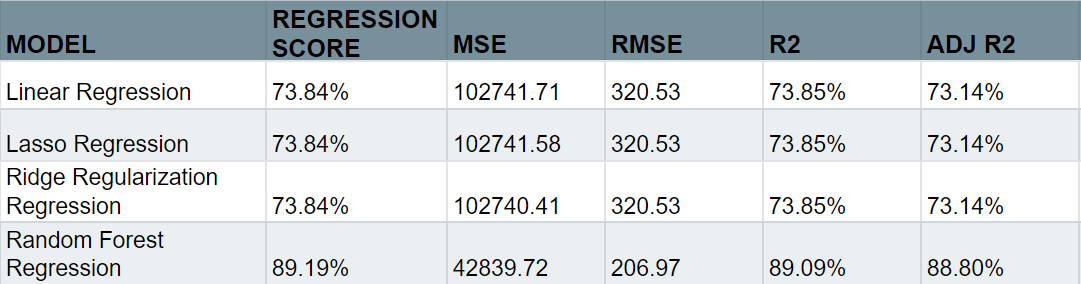

##Know the Important Features

In [683]:
#Important feature for 'Random Forest'
feature_importance=pd.DataFrame(list(zip(df_copy.columns,rf_reg.feature_importances_)))

In [684]:
rf_reg.feature_importances_

array([3.91950801e-01, 1.80007816e-01, 1.31724989e-02, 1.32598874e-02,
       3.36283078e-02, 2.92704469e-02, 1.73319036e-03, 4.45341828e-03,
       2.33138920e-02, 4.18967523e-03, 6.38918145e-03, 1.44891448e-02,
       2.39082388e-02, 3.32068402e-02, 2.97226481e-02, 1.03188661e-02,
       5.23964389e-03, 1.81916528e-02, 1.28499716e-03, 2.16855775e-03,
       1.17994755e-03, 6.44430989e-04, 3.26031660e-04, 5.00293281e-04,
       1.32206773e-03, 3.68045694e-03, 1.14545893e-02, 4.33593961e-02,
       1.80736004e-02, 1.42406835e-02, 1.41243807e-02, 1.15824169e-02,
       5.97087240e-03, 1.56130604e-03, 2.05085305e-03, 8.47423958e-04,
       5.96146229e-04, 4.32135212e-04, 9.62230801e-04, 3.69203385e-03,
       5.11105217e-03, 1.46420392e-03, 1.09329695e-02, 4.62198459e-03,
       1.36878801e-03])

In [685]:
feature_importance

0         1
0          rented_bikes  0.391951
1           temperature  0.180008
2              humidity  0.013172
3            wind_speed  0.013260
4            visibility  0.033628
5       solar_radiation  0.029270
6              rainfall  0.001733
7              snowfall  0.004453
8               holiday  0.023314
9                  week  0.004190
10               hour_0  0.006389
11               hour_1  0.014489
12               hour_2  0.023908
13               hour_3  0.033207
14               hour_4  0.029723
15               hour_5  0.010319
16               hour_6  0.005240
17               hour_7  0.018192
18               hour_8  0.001285
19               hour_9  0.002169
20              hour_10  0.001180
21              hour_11  0.000644
22              hour_12  0.000326
23              hour_13  0.000500
24              hour_14  0.001322
25              hour_15  0.003680
26              hour_16  0.011455
27              hour_17  0.043359
28              hour_18  0.018074
29              hour_19  0.014241
30              hour_20  0.014124
31              hour_21  0.011582
32              hour_22  0.005971
33              hour_23  0.001561
34     month_name_April  0.002051
35    month_name_August  0.000847
36  month_name_December  0.000596
37  month_name_February  0.000432
38   month_name_January  0.000962
39      month_name_July  0.003692
40      month_name_June  0.005111
41     month_name_March  0.001464
42       month_name_May  0.010933
43  month_name_November  0.004622
44   month_name_October  0.001369

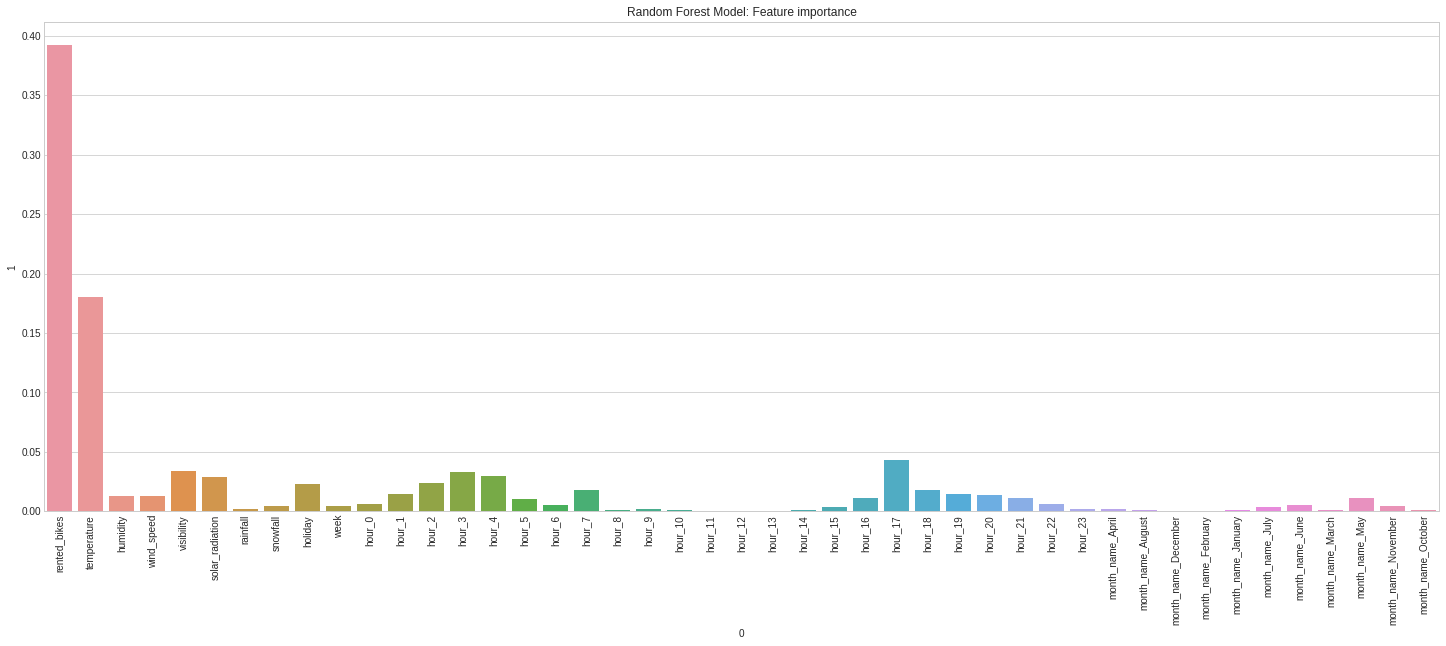

In [686]:
plt.figure(figsize=(25,9))
plt.title('Random Forest Model: Feature importance')
plt.xticks(rotation=90)
sns.barplot(x=feature_importance[0],y=feature_importance[1])
plt.show()

Among the independent features 'temperature' has higher importance